# Time Spent-Bill Amount Analysis of Restaurants

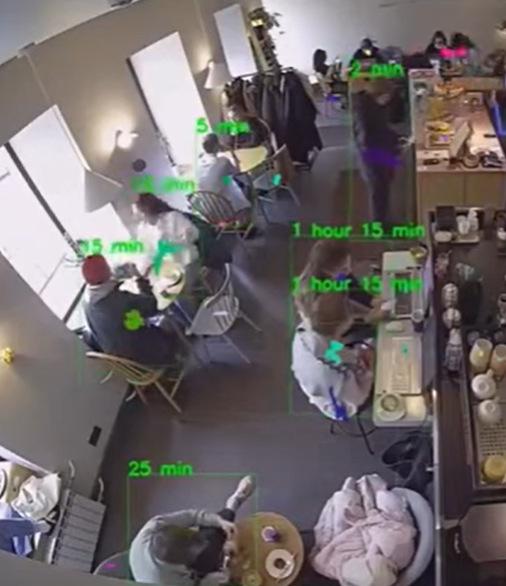

## Data Set

Bu calismada; musterilerin lokantada gecirdikleri sure ile odedikleri hesap miktari arasindaki iliski, Machine Learning ve Artificial Neaural Network (ANN) yontemleri kullanilarak analiz edilmistir. Musterilerin lokantada gecirdikleri sure, oturduklari masa ve masadaki kisi sayisi gibi bilgilerin guvenlik kamerasindan alinmasi planlanmistir. Kullaniln veriler ve acikalamari asagidaki gibidir:

**Day:** Musterinin lokantaya geldigi gun 

**Entry Time:** Musterinin lokantaya girdigi saat

**Exit Time:** Musterinin lokantadan ciktigi saat

**Meal Type:** Breakfast, Lunch, Dinner

**Number of People:** Musterinin lokantaya kac kisi ile birlikte geldigi (Masada kac kisi ile birlikte yemek yedigi) 

**Time Spent (minutes):** Musterinin lokantada ne kadar sure gecirdigi

**Bill Amount ($):** Musterinin ne kadar hesap odedigi (kisi basina odenen hesap miktari)

**Gender:** Male, Female, Other

**Table Location:** Window, Patio (Veranda, avlu), Center

**Reservation:** Musterinin onceden rezervasyon yaptirip yaptirmadigi bilgisi. 

**Customer Satisfaction:** Musterinin yedigi yemekten ve aldigi hizmetten hissettigi memnuniyet derecesi ((1-5 arasi puanlar)

**Live Music:** Yemek yenirken lokantada canli muzik sergilenip sergilanmadigi bilgisi

**Age Group:** Musterinin yas grubu. 18-25; 26-35; 36-45; 46-55; 56-65; 65+

**Weather Condition:** Cloudy, Sunny, Sbowy, Rainy

Bu veri setine; https://www.kaggle.com/datasets/ismetgocer/time-spent-bill-amount-data-of-restaurants adresinden ulasabilirsiniz. 

# Bu Calsimada Izlenen Veri Analizi ve Modelleme Süreci Özeti

Bu belgede, yapay öğrenme (Artificial Neural Network - ANN) ve makine öğrenimi (Machine Learning - ML) teknikleri kullanılarak gerçekleştirilen veri analizi ve modelleme sürecinin adımları özetlenmektedir.

## Veri Hazırlama

1. **Encoding**: Verileri 0 ve 1'ler olarak ifade edecek şekilde dönüştürdük.
2. **Train-Test Split**: Veri setini eğitim ve test setleri olarak ayırdık.
3. **Scaling**: Değerleri küçültmek için ölçeklendirme işlemi gerçekleştirdik.

## Model Geliştirme

1. **ANN Modeli**: Yapay Sinir Ağı modelini kurduk ve eğittik.
2. **Makine Öğrenimi Yöntemleri**: 12 farklı ML yöntemi kullanarak tahminler yaptık. Eğitim setinde yüksek skorlar elde ederken, test setinde düşük skorlar gözlemledik. Bu, aşırı uyuma (overfitting) işaret ediyor.
3. **GridsearchCV**: Aşırı uyum sorununu çözmek için Karar Ağacı (DT) ve XGBoost (XGB) modelleri için GridsearchCV uygulayarak en iyi hiperparametreleri belirledik.

## Final Model

1. **Veri Yeniden Hazırlama**: Veriyi baştan okuyup, encoding, labelleme ve scaling işlemlerini tekrar uyguladık. Scaling işlemi, Streamlit'te yeni gelen veriler için de kullanılmak üzere dışa aktarıldı.
2. **Final Modeller**: Tüm veri setini ve belirlenen en iyi hiperparametreleri kullanarak Final DT ve Final XGB modellerini eğittik.
3. **Model Kaydetme**: Final ML modellerini pickle veya joblib ile dışa aktarabiliriz.
4. **Final ANN Modeli**: Tüm veri seti kullanılarak Final ANN modeli 1500 Epoch ile eğitildi ve h5 veya keras formatında dışa aktarıldı.

## Tahminleme (Prediction)

1. **Veri Hazırlama ve Scaling**: Dışa aktarılan scaler ve modelleri tekrar yükledik. Seçilen gözlem (satır) için scaling uygulandı.
2. **Model Tahminleri**: Final DT, Final XGB ve Final ANN modelleri ile tahminler alındı.
3. **Yeni Gözlem İçin Tahmin**: Dışarıdan gelen yeni bir gözleme ait veriler manuel olarak girildi, encoding ve scaling işlemleri uygulandı. Bu veri, Final DT, Final XGB ve Final ANN modelleri ile tahmin edildi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import applications

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Read and Look at the Datase

In [3]:
df = pd.read_csv("restaurant_data.csv") 
df.head(3)

,Day,Entry Time,Exit Time,Meal Type,Number of People,Time Spent (minutes),Bill Amount ($),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Saturday,17:14,18:56,Dinner,4,102,117.08,Female,Window,False,4,False,18-25,Cloudy
1,Friday,22:13,23:15,Dinner,4,62,45.80,Female,Window,True,2,False,26-35,Snowy
2,Sunday,13:02,13:42,Lunch,3,40,34.64,Male,Center,False,1,True,36-45,Sunny


## Drop 

In [4]:
df.drop(['Entry Time', 'Exit Time'], axis=1, inplace=True)

In [5]:
df.head(2)

,Day,Meal Type,Number of People,Time Spent (minutes),Bill Amount ($),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Saturday,Dinner,4,102,117.08,Female,Window,False,4,False,18-25,Cloudy
1,Friday,Dinner,4,62,45.80,Female,Window,True,2,False,26-35,Snowy


# 1. EDA
## 1.1. Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day                    2000 non-null   object 
 1   Meal Type              2000 non-null   object 
 2   Number of People       2000 non-null   int64  
 3   Time Spent (minutes)   2000 non-null   int64  
 4   Bill Amount ($)        2000 non-null   float64
 5   Gender                 2000 non-null   object 
 6   Table Location         2000 non-null   object 
 7   Reservation            2000 non-null   bool   
 8   Customer Satisfaction  2000 non-null   int64  
 9   Live Music             2000 non-null   bool   
 10  Age Group              2000 non-null   object 
 11  Weather Condition      2000 non-null   object 
dtypes: bool(2), float64(1), int64(3), object(6)
memory usage: 160.3+ KB


In [7]:
df.head(2)

,Day,Meal Type,Number of People,Time Spent (minutes),Bill Amount ($),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Saturday,Dinner,4,102,117.08,Female,Window,False,4,False,18-25,Cloudy
1,Friday,Dinner,4,62,45.80,Female,Window,True,2,False,26-35,Snowy


## 1.2. Null Check

In [8]:
df.isna().sum()

Day                      0
Meal Type                0
Number of People         0
Time Spent (minutes)     0
Bill Amount ($)          0
Gender                   0
Table Location           0
Reservation              0
Customer Satisfaction    0
Live Music               0
Age Group                0
Weather Condition        0
dtype: int64

## 1.3. Shape

In [9]:
df.shape

(2000, 12)

## 1.4. Unique Values

In [10]:
def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 10
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Day,7,"[Saturday, Friday, Sunday, Tuesday, Monday, We...",object
1,Meal Type,3,"[Dinner, Lunch, Breakfast]",object
2,Number of People,6,"[4, 3, 5, 6, 2, 1]",int64
3,Time Spent (minutes),151,-,int64
4,Bill Amount ($),1849,-,float64
5,Gender,3,"[Female, Male, Other]",object
6,Table Location,3,"[Window, Center, Patio]",object
7,Reservation,2,"[False, True]",bool
8,Customer Satisfaction,5,"[4, 2, 1, 3, 5]",int64
9,Live Music,2,"[False, True]",bool


## 1.5. Column Names

In [10]:
df.columns

Index(['Day', 'Meal Type', 'Number of People', 'Time Spent (minutes)',
       'Bill Amount ($)', 'Gender', 'Table Location', 'Reservation',
       'Customer Satisfaction', 'Live Music', 'Age Group',
       'Weather Condition'],
      dtype='object')

## 1.6. Descriptive Statistics

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of People,2000.0,3.52750,1.709885,1.00,2.0000,4.000,5.00,6.00
Time Spent (minutes),2000.0,104.16350,43.696928,30.00,66.0000,104.000,142.00,180.00
Bill Amount ($),2000.0,100.41142,32.820357,25.12,75.9375,98.685,123.29,205.85
Customer Satisfaction,2000.0,3.00550,1.415440,1.00,2.0000,3.000,4.00,5.00


## 1.7. Correlation

In [12]:
# Sadece numeric kolonlari sectim ve onlar arasindaki korealsyona bakiyorum
df.select_dtypes(include=[np.number]).corr()

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction
Number of People,1.000000,-0.014887,0.002103,-0.019182
Time Spent (minutes),-0.014887,1.000000,0.812608,-0.009324
Bill Amount ($),0.002103,0.812608,1.000000,0.231861
Customer Satisfaction,-0.019182,-0.009324,0.231861,1.000000


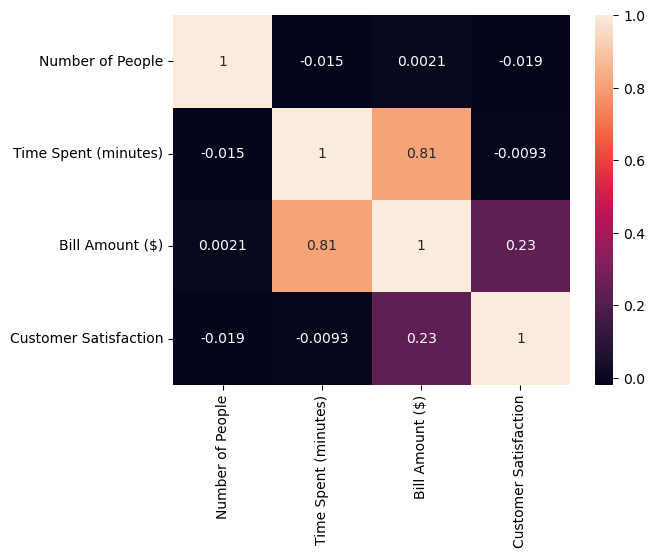

In [13]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot = True);

## 1.8. Pairplot

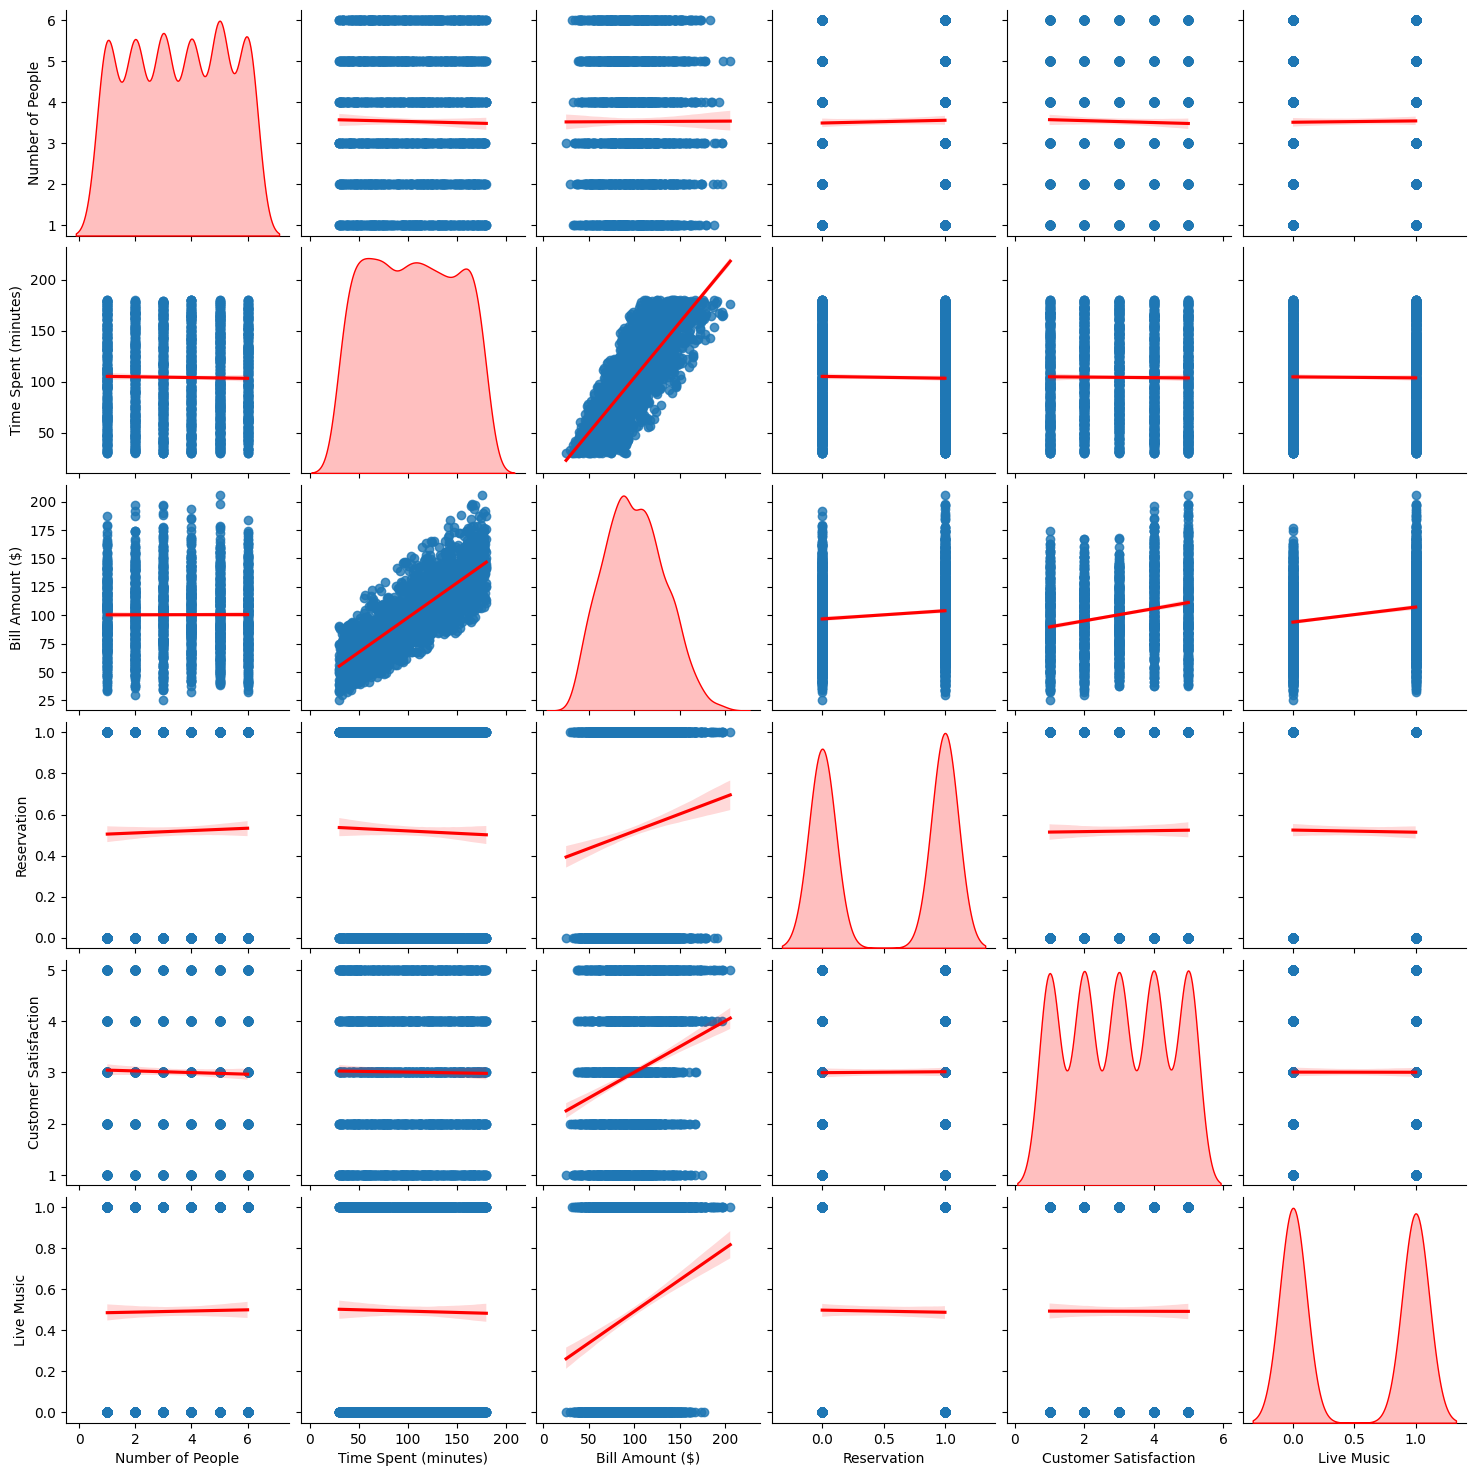

In [14]:
sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

## 1.9. Outliers Check

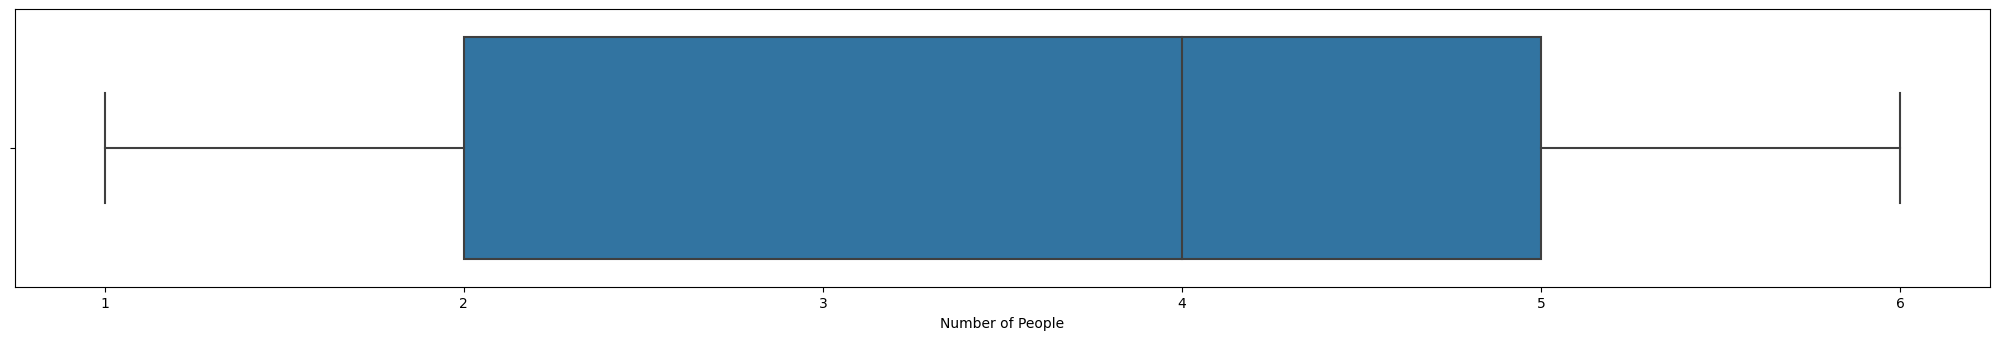

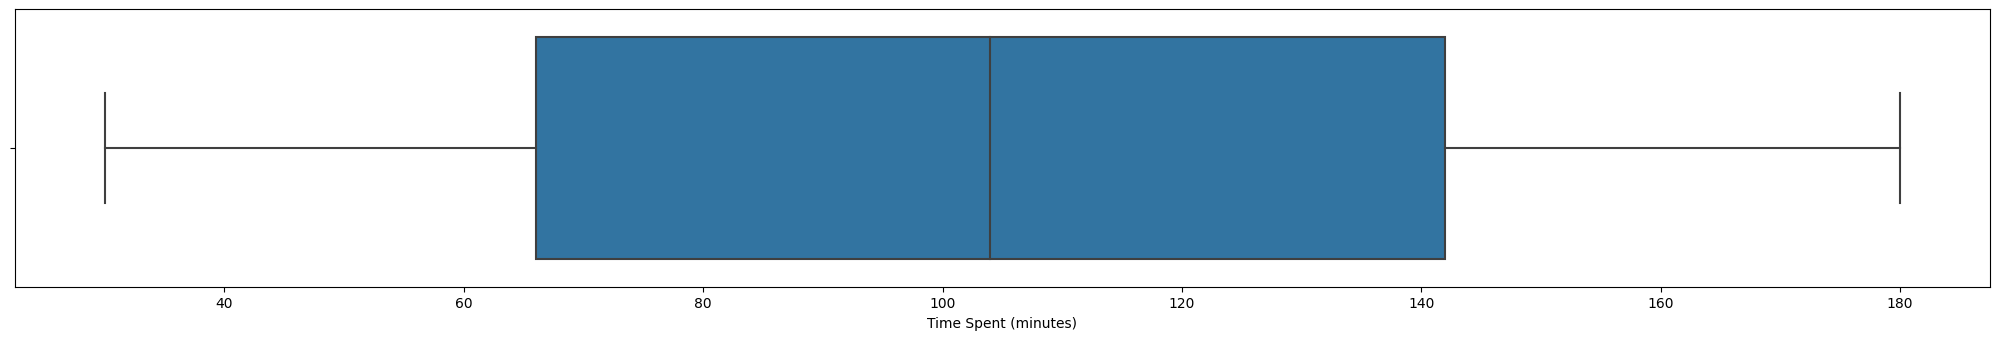

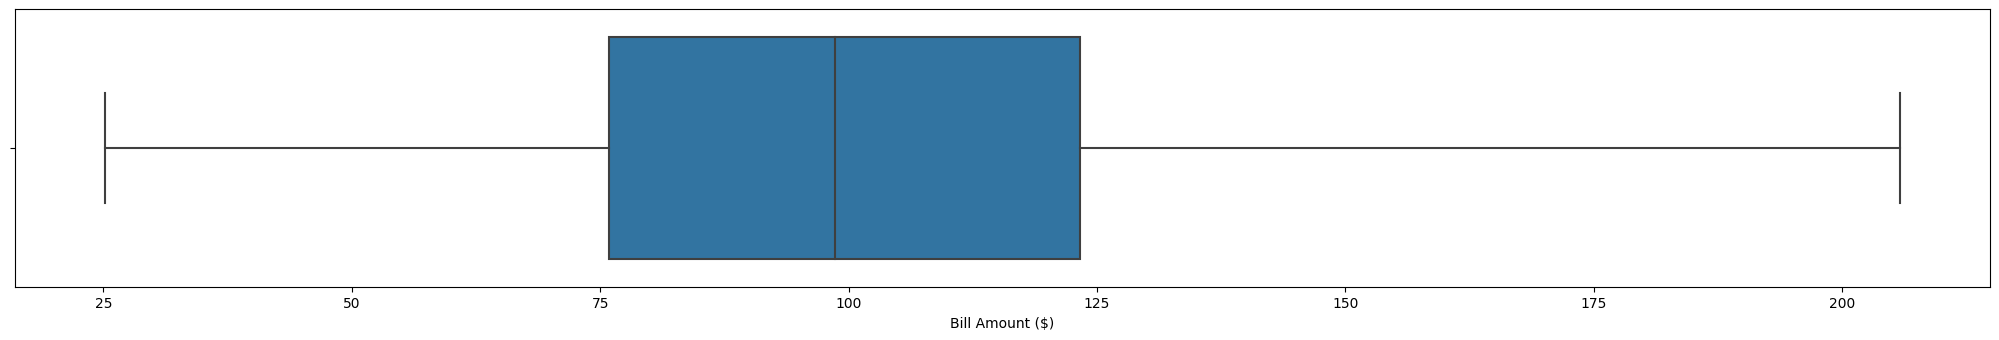

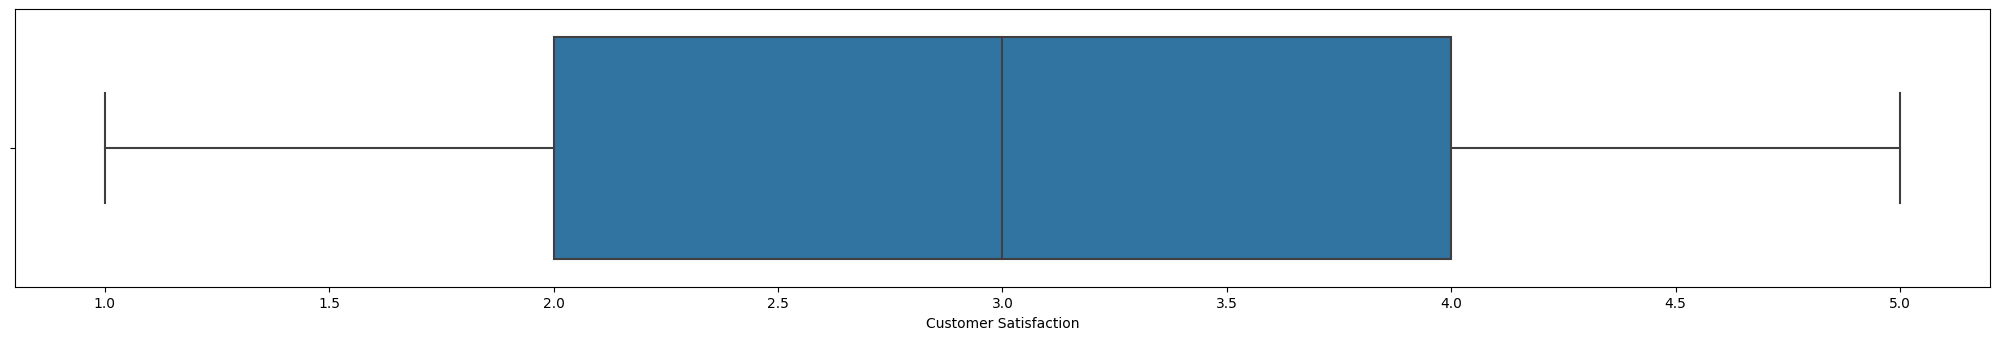

In [15]:
# Let's draw boxplots and histplots for checking distributions of features;
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3) 
        
    plt.tight_layout()
    
    plt.show()

## 1.10. Bar Charts

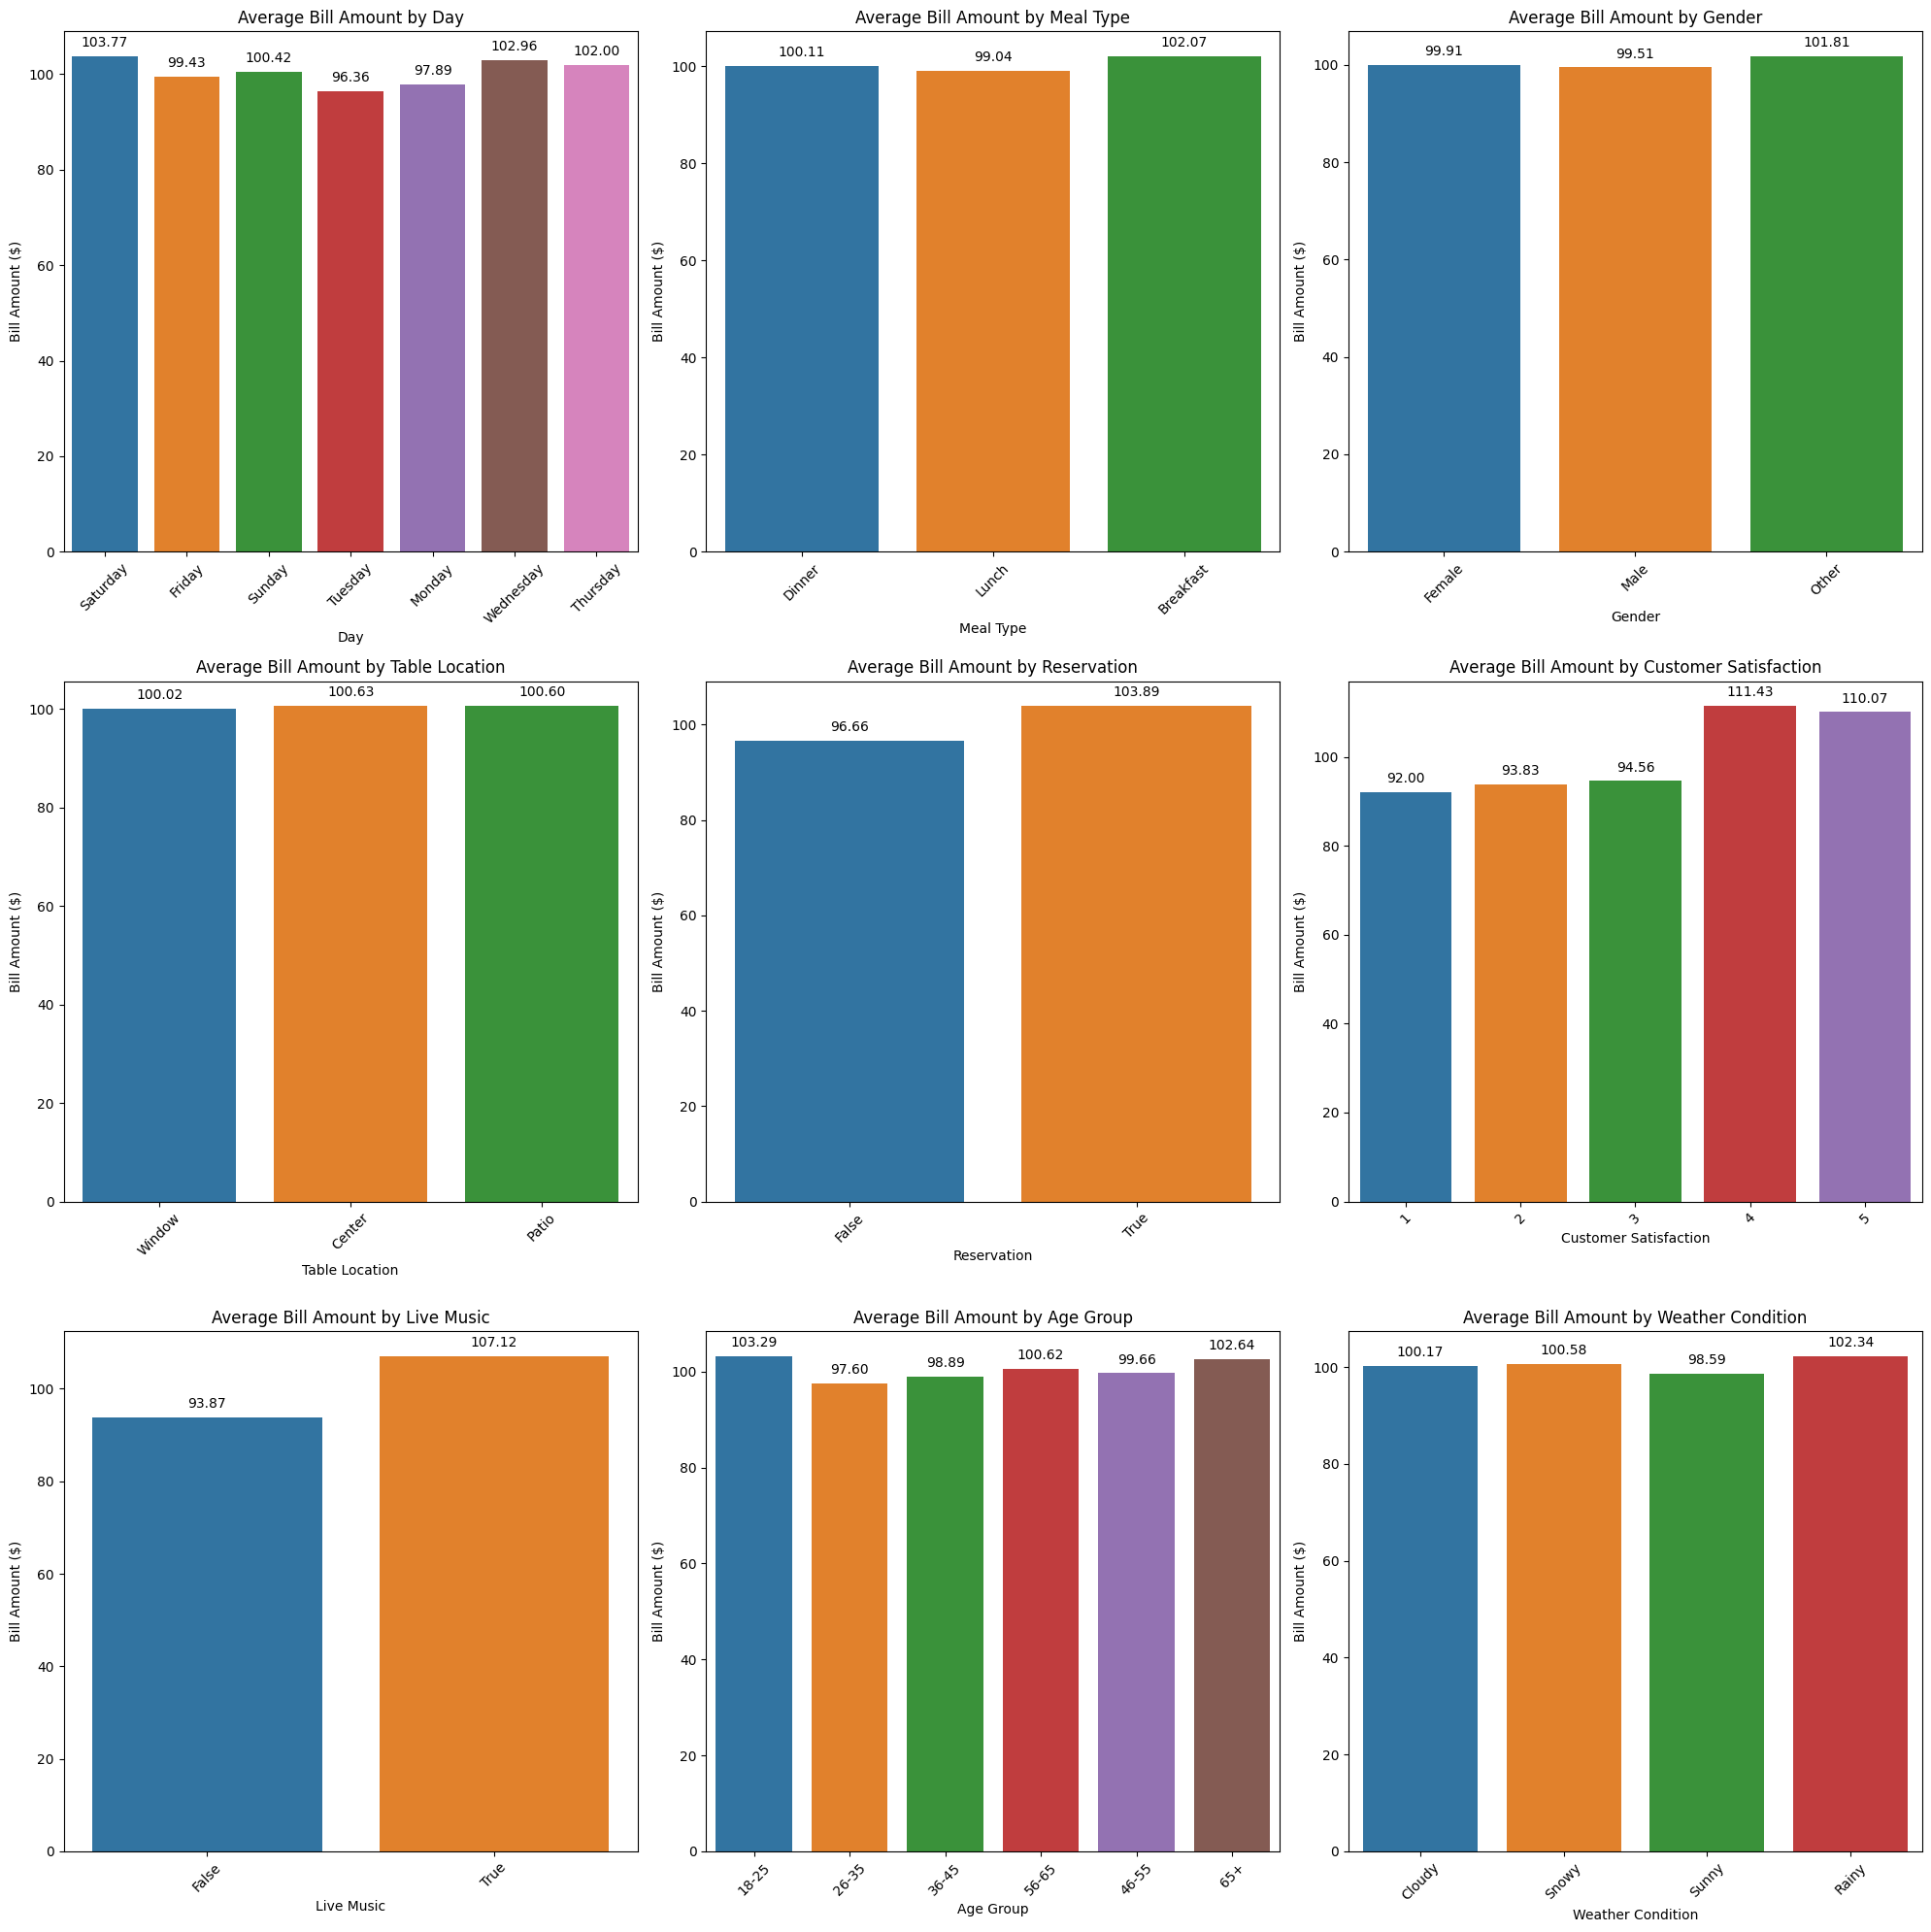

In [16]:
# Kategorik verilere gore odenen hesap miktarlari 
# Kategorik sütunların listesi
categorical_columns = ['Day', 'Meal Type', 'Gender', 'Table Location', 'Reservation', 'Customer Satisfaction', 'Live Music', 'Age Group', 'Weather Condition']

# Her kategorik sütun için ortalama 'Bill Amount ($)' gösteren bar chart oluşturma
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid layout
    barplot = sns.barplot(x=column, y='Bill Amount ($)', data=df, ci=None)  # Confidence interval kaldırıldı
    plt.title(f'Average Bill Amount by {column}')
    plt.xticks(rotation=45)
    
    # Bar üstlerine değerleri yazdırma
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')

plt.tight_layout()
plt.show()

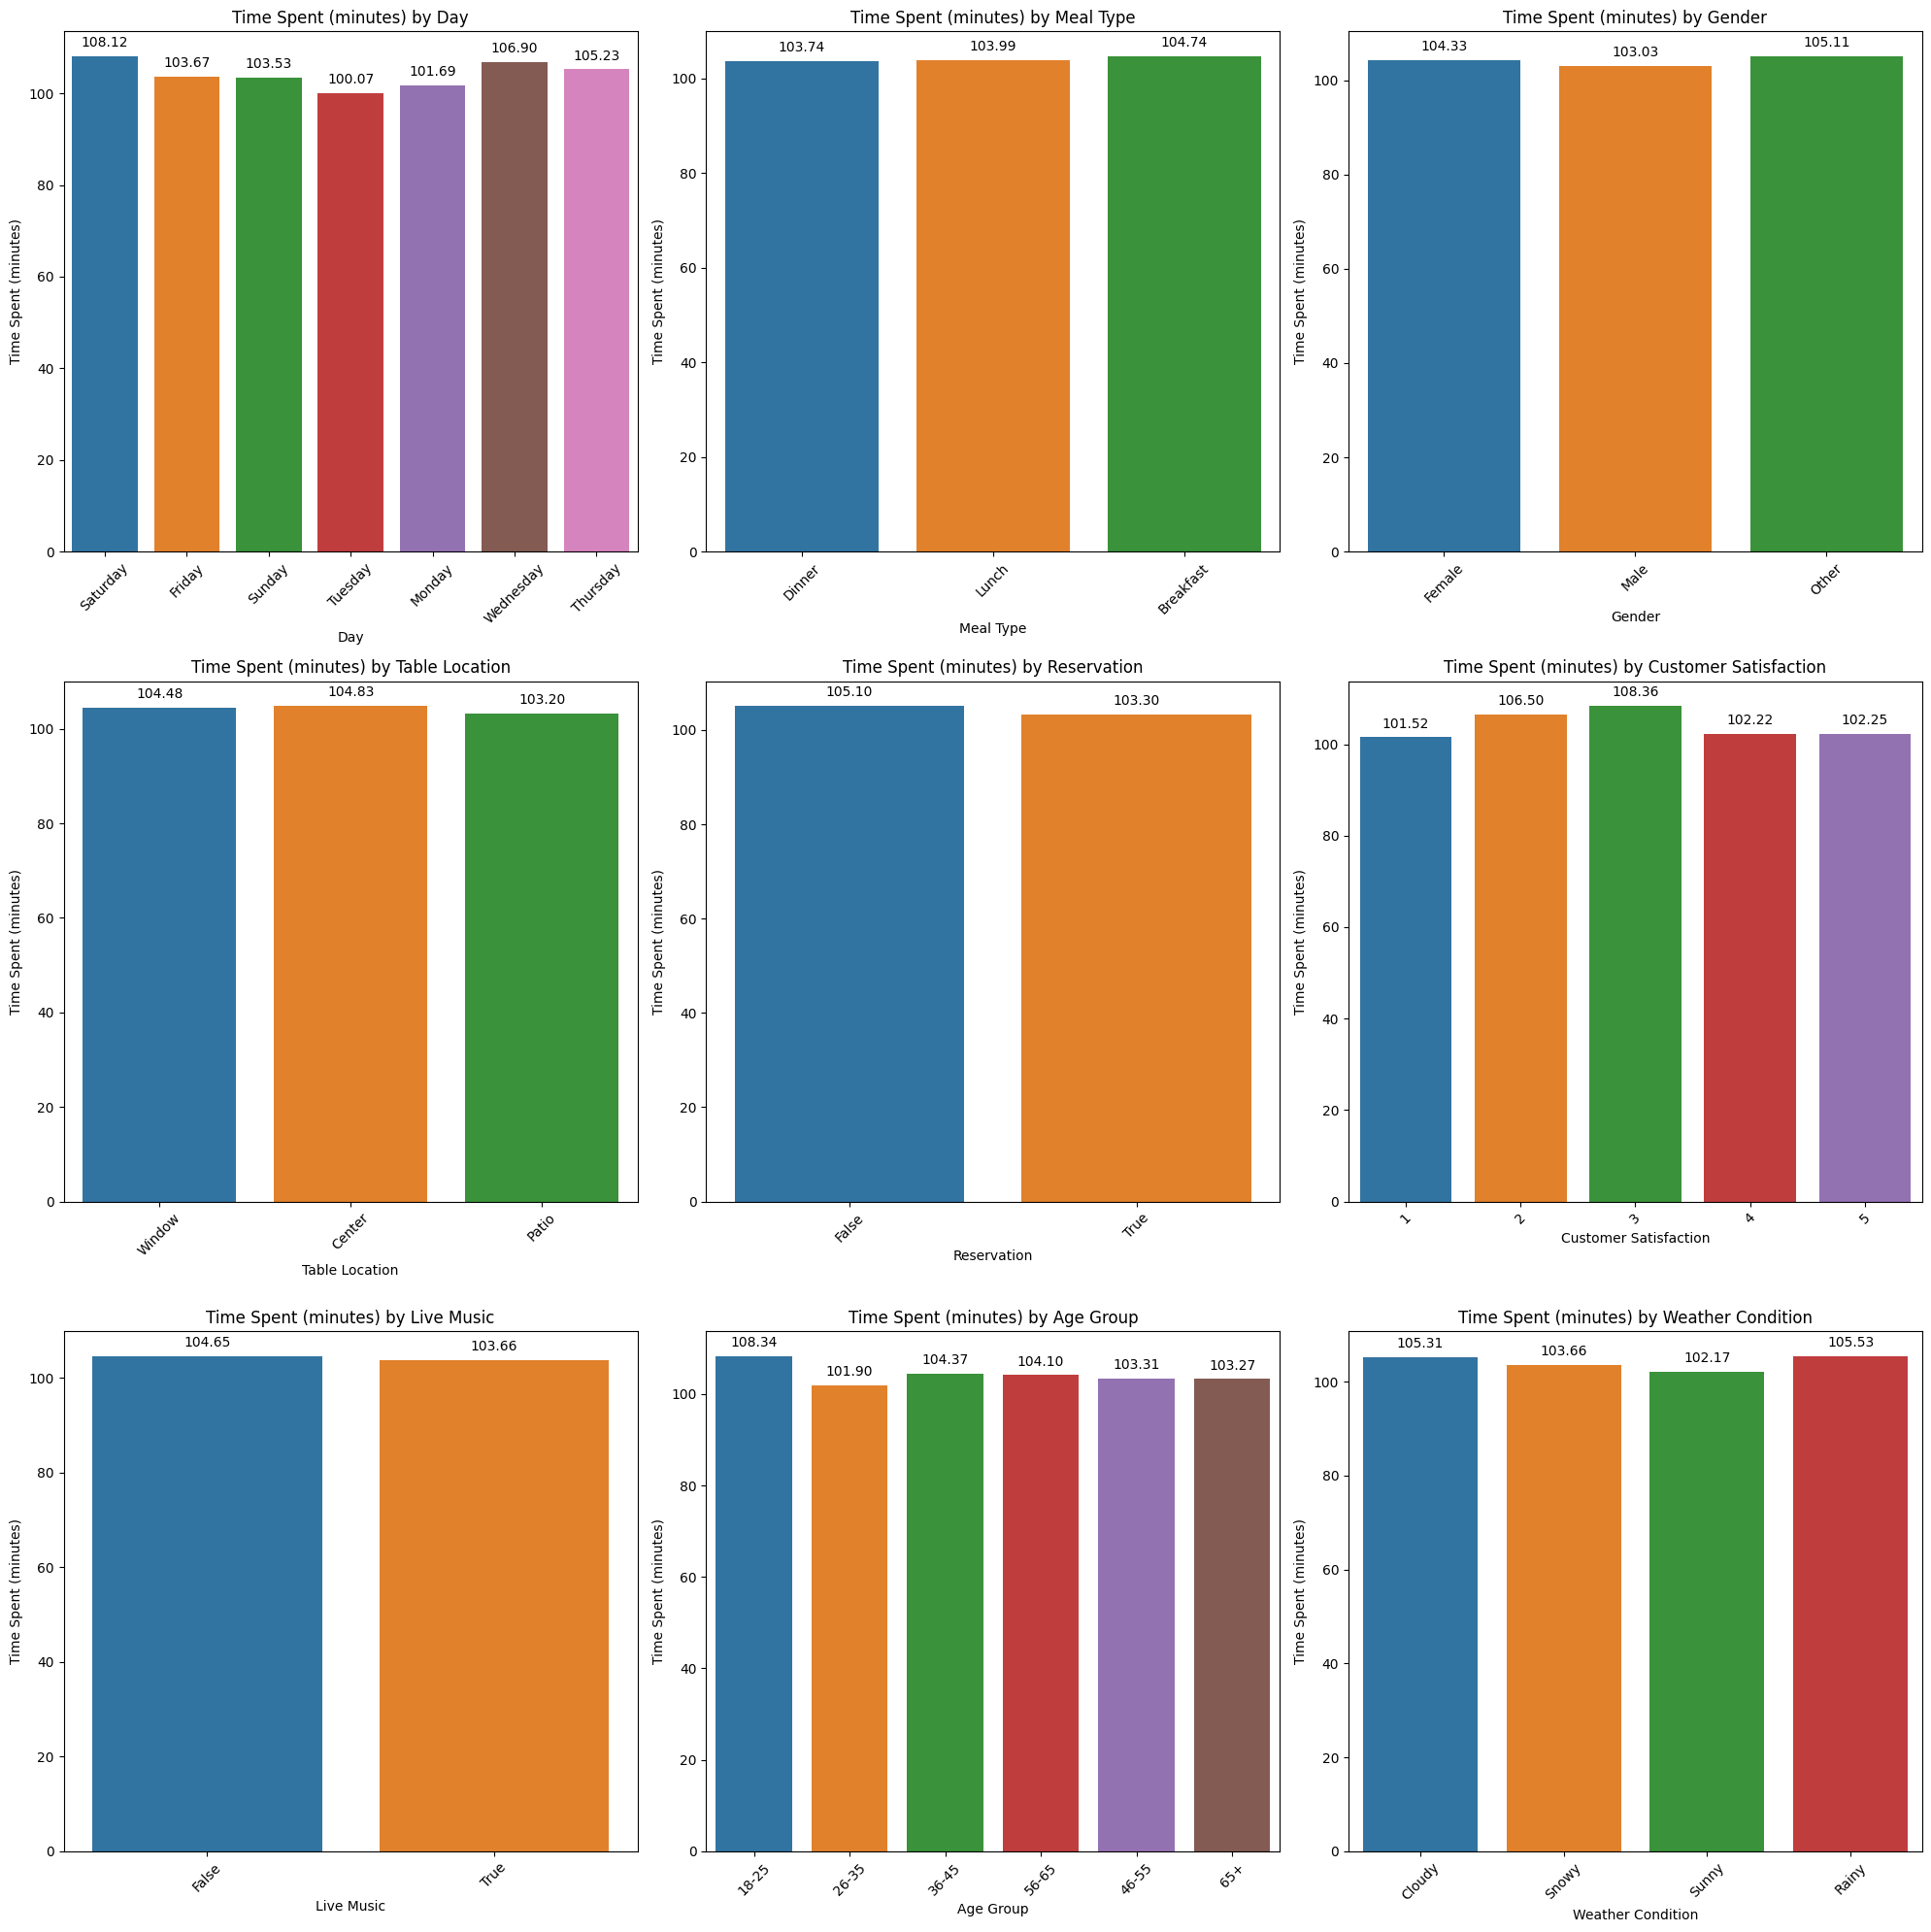

In [17]:
# Kategorik verilere gore harcanan zaman miktarlari
# Kategorik sütunların listesi
categorical_columns = ['Day', 'Meal Type', 'Gender', 'Table Location', 'Reservation', 'Customer Satisfaction', 'Live Music', 'Age Group', 'Weather Condition']

# Her kategorik sütun için ortalama 'Bill Amount ($)' gösteren bar chart oluşturma
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid layout
    barplot = sns.barplot(x=column, y='Time Spent (minutes)', data=df, ci=None)  # Confidence interval kaldırıldı
    plt.title(f'Time Spent (minutes) by {column}')
    plt.xticks(rotation=45)
    
    # Bar üstlerine değerleri yazdırma
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points')

plt.tight_layout()
plt.show()

## 1.11. Scatterplot 

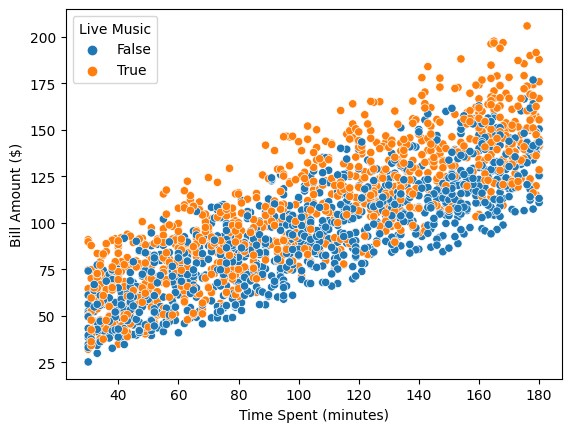

In [18]:
sns.scatterplot(x="Time Spent (minutes)", y= "Bill Amount ($)", data = df, hue = "Live Music");

**Insight:** Live music oldgu gunlerde kisilerin odedikleri hesap daha fazladir.   

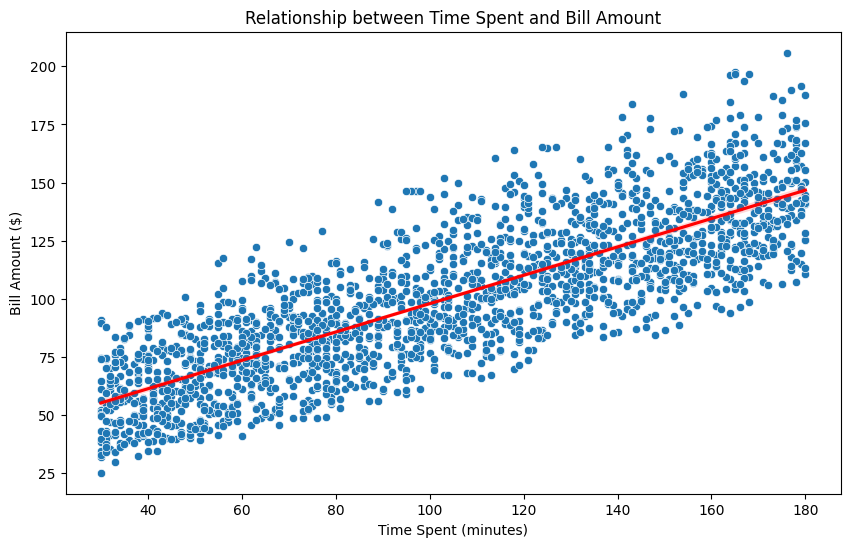

In [19]:
# Time Spent (minutes) ile Bill Amount ($) arasındaki ilişkiyi scatter plot ile inceleme ve eğilim çizgisi ekleme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time Spent (minutes)', y='Bill Amount ($)', data=df)
sns.regplot(x='Time Spent (minutes)', y='Bill Amount ($)', data=df, scatter=False, color='red')  # Kırmızı eğilim çizgisi
plt.title('Relationship between Time Spent and Bill Amount')
plt.show()

**Insight:** Musterilerin restoranda harcadiklari sure arttikca odedikleri hesap miktari da artmistir.

# 2. DEEP LEARNING

## 2.1. Encoding

Veri setindeki; gun, hava durumu, vb. kategorik degiskenleri sayisal hale getirmek icin

In [14]:
df.head(2)

,Day,Meal Type,Number of People,Time Spent (minutes),Bill Amount ($),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Saturday,Dinner,4,102,117.08,Female,Window,False,4,False,18-25,Cloudy
1,Friday,Dinner,4,62,45.80,Female,Window,True,2,False,26-35,Snowy


In [22]:
df.columns

Index(['Day', 'Meal Type', 'Number of People', 'Time Spent (minutes)',
       'Bill Amount ($)', 'Gender', 'Table Location', 'Reservation',
       'Customer Satisfaction', 'Live Music', 'Age Group',
       'Weather Condition'],
      dtype='object')

In [15]:
# Siralamanin onemli olmadigini dusundugumuz verilere "One-Hot Encoding" uygulayabiliyoruz

df = pd.get_dummies(df, columns=['Live Music', 'Reservation', 'Meal Type', 'Day', 'Gender', 'Table Location', 'Age Group', 'Weather Condition'], drop_first=True)

In [11]:
df.head(2)

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,117.08,4,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
1,4,62,45.80,2,False,True,True,False,False,False,...,False,True,True,False,False,False,False,False,True,False


In [16]:
# Boolean veri tipini int'e çevirelim

for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

In [13]:
df.head(2)

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,117.08,4,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,4,62,45.80,2,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


## Save the Encoding

In [17]:
# Encode edilmis data setini pickle olarak kaydetmek 
# Bunu basta 1 defa yapip, encoding islemini disa aktardiktan sonra datayi 
# bastan okutup, burayi atlayarak calistirdim ki df i butun olarak koruyabileyim. 
# Bunu kaydetmemin nedeni; prediction asamasinda yeni gelen veriye de encoding yapabilmek. 
# Yeni gelen datada "Bill Amount ($)" verisi yer almayacagi icin onu drop ederek yaptim 
# encoding islemini ve bu halini kaydettim. 
"""df.drop(["Bill Amount ($)"], axis = 1).to_pickle('encoded_data.pkl')
df.to_pickle('encoded_data.pkl')"""

## Datayi Yeniden Okutup Analize Hazir Hale Getirelim

Bir ust satirda "Bill Amount ($)" u drop ettik, ama analizde buna ihtiyacimiz var. Bu nedenle datayi bastan okutup, encoding islemini yeniden yapalim.

In [21]:
# Datayi yeniden okutalim;
df = pd.read_csv("restaurant_data.csv") 

# Giris-cikis saatlerini drop edelim
df.drop(['Entry Time', 'Exit Time'], axis=1, inplace=True)

# Encoding yapalim
df = pd.get_dummies(df, columns=['Live Music', 'Reservation', 'Meal Type', 'Day', 'Gender', 'Table Location', 'Age Group', 'Weather Condition'], drop_first=True)

# Encodingde olusan "Boolean" veri tipini integere'e çevirelim
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)

df.head(2)

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,117.08,4,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,4,62,45.80,2,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


## 2.1. Labelling

In [22]:
X = df.drop(["Bill Amount ($)"], axis = 1)
y = df["Bill Amount ($)"]

## 2.3. Split Train & Test

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

## 2.4. Scaling the Data

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()

In [25]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2.5. Modelling

In [26]:
X_train.shape

(1600, 25)

In [34]:
# DL modelini kuruyoruz;
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

seed = 101

tf.random.set_seed(seed) #random sayi uretirken belli bir cekirdek etrafinda dolanmasini ve boylece herkeste ayni sonucun cikmasini saglar.

model = Sequential() # katmanli, ard arda yapi kullanacagiz.

# 1. Hidden Layer
model.add(Dense(32, input_dim=X_train.shape[1], activation = 'relu')) # X_train.shape[1]; Kullanilan feature sayisini belirtir. 
#model.add(Dropout(0.2)) # %20sini sondur / sifirla   daha iyi bir ogrenme gerceklessin diye


# 2. Hidden Layer
model.add(Dense(32, activation = 'relu')) # Hidden layerdeki noron 32 tane olacak. 
#model.add(Dropout(0.2))   # Bunu kullaninca skorlar kotulasti. 


# 3. Hidden Layer
model.add(Dense(16, activation = 'relu')) # Aktivasyon fonksiyonu ara basamaklarda relu kullaniliyor 
#model.add(Dropout(0.2))


# 4. Hidden Layer
model.add(Dense(8, activation = 'relu'))  # Sona dogru olan hidden layerlerde noron sayisinin azaltilarak verilmesi "best practice"
#model.add(Dropout(0.2))

# Cikis Katmani
model.add(Dense(1)) # Rgresyon oldugu icin Dense 1 olmali!!!     

# Optimizer'i tanimlayalim 
optimizer = Adam(lr = 0.003) # default learning rate value is 0.001. Bunu 0.002 / 0.003 yapabiliriz. Adam optimizer#i kullaniyoruz burada. Gredient descent de kullanilabilir burada. 

#Modeli compile edelim
model.compile(optimizer = 'adam', loss = 'mse') # Bu satiri dogru ver! Regresyon analizlerinde loss = 'mse' olmasi onemli. 

# Early Stop
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25) # "patience=25" epoch boyunca sabret, ondan daha iyi bir skor gelmezse stop et demek. 
# patiance genelde 15, 20, 25 gibi verilir. 
# mode = "auto" Loss degeri dustugu zaman bizim icin daha iyi demek

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.5.1. Fit the model 

In [35]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 128, epochs = 100) # epoch 1000 olursa 20-25 dk suruyor
# validation_split = 0.15   train datasi icindeki datanin ne kadarini validation olarak degerlenduirdigimizi gosteriyor. Cross-Valuiidation orani

Epoch 1/100
11/11 [==============================] - 5s 21ms/step - loss: 11235.2314 - val_loss: 10338.4561
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 11176.2051 - val_loss: 10306.6748
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 11141.1611 - val_loss: 10266.4014
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 11085.9443 - val_loss: 10191.2295
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 10970.2939 - val_loss: 10025.0605
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 10724.5498 - val_loss: 9689.5332
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 10231.1904 - val_loss: 9042.3604
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 9320.1172 - val_loss: 7894.6333
Epoch 9/100
11/11 [==============================] - 0s 5ms/step - loss: 7785.4976 - val_loss: 6094.9146
Epoch 10/100
11/11 [======================

### 2.5.2. Model History

In [36]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,11235.231445,10338.456055
1,11176.205078,10306.674805
2,11141.161133,10266.401367
3,11085.944336,10191.229492
4,10970.293945,10025.060547
...,...,...
95,231.326767,245.948257
96,230.776398,246.587402
97,231.373688,245.016144
98,230.846741,247.710358


### 2.5.3. Model Evaluation

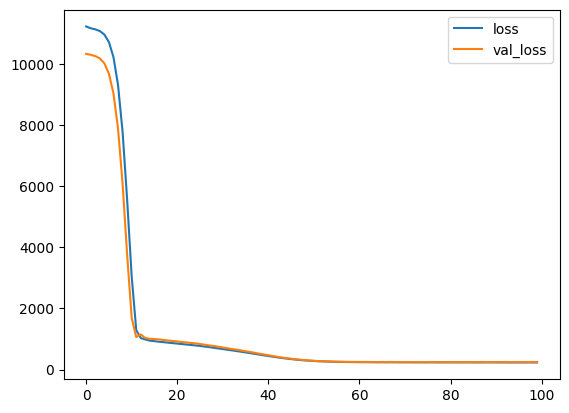

In [37]:
loss_df = pd.DataFrame(model.history.history)# Bu iki egri birbirine yakin olmalidir. 
loss_df.plot();

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [39]:
model.evaluate(X_test, y_test, verbose=0) # test datasindaki loss miktari

236.36495971679688

In [40]:
y_pred = model.predict(X_test)

13/13 [==============================] - 0s 1ms/step


In [41]:
eval_metric(y_test, y_pred) # hic bir degisiklik yapmadan tekrar calsitir modeli, bunun sonucu iyilesebilir
# Bunun sebebi; agirlik ve bias'in random olarak seciliyor olmasi. 
# ANN sacmalarsa buna "Halusulasyon" denir, modeli tekrar calistir, duzelebilir. 
# Hala duzelmiyorsa Epoch artirilabilir, diger parametreler degistirilebilir. 

r2_score: 0.7815620161109285 
mae: 12.841024298095704 
mse: 236.36497009204663 
rmse: 15.374165671412761


**Sonuc:** ANN sonucu istedgimiz gibi degil. ML yapacagiz. 

# 3. MACHINE LEARNING 

Burada 12 tane ML yontemi bir arada calistirilacaktir.

In [42]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [43]:
ridge=Ridge().fit(X_train, y_train)
lasso=Lasso().fit(X_train, y_train)
enet=ElasticNet().fit(X_train, y_train)
knn=KNeighborsRegressor().fit(X_train, y_train)
ada=AdaBoostRegressor().fit(X_train, y_train)
svm=SVR().fit(X_train, y_train)
dtc=DecisionTreeRegressor().fit(X_train, y_train)
rf=RandomForestRegressor().fit(X_train, y_train)
xgb=XGBRegressor().fit(X_train, y_train)
gbm=GradientBoostingRegressor().fit(X_train, y_train)
lgb=LGBMRegressor().fit(X_train, y_train) # LightGBM
catbost=CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.044099
0:	learn: 31.8021800	total: 53.4ms	remaining: 53.3s
1:	learn: 30.9523363	total: 54.7ms	remaining: 27.3s
2:	learn: 30.0158558	total: 55.8ms	remaining: 18.5s
3:	learn: 29.1401388	total: 56.9ms	remaining: 14.2s
4:	learn: 28.3976199	total: 58.3ms	remaining: 11.6s
5:	learn: 27.6787546	total: 59.4ms	remaining: 9.84s
6:	learn: 26.9612781	total: 60.5ms	remaining: 8.58s
7:	learn: 26.2788826	total: 61.6ms	remaining: 7.63s
8:	learn: 25.6592303	total: 62.6ms	remaining: 6.9s
9:	learn: 25.1050119	total: 63.7ms	remaining: 6.31s
10:	learn: 24.4702296	total: 65.1ms	remaining: 5.86s
11:	learn: 23.9306578	total: 66.2ms	remaining: 5.45s
12:	learn: 23.4550140	total: 67.4ms	remaining: 5.11s
13:	learn: 22.9646842	total: 68.2ms	remaining: 4.8s
14:	learn: 22.4840292	total: 69.3ms	remaining: 4.55s
15:	learn: 22.0351807	total: 70.4ms	remaining: 4.33s
16:	learn: 21.6005604	total: 71.4ms	remaining: 4.13s
17:	learn: 21.2142936	total: 72.4ms	remaining: 3.95s
18:	learn: 20.8091404	total:

## 3.1. Train datasi icin skorlari alalim

In [44]:
models=[ridge,lasso,enet,knn,ada,svm,dtc,rf,xgb,gbm,lgb,catbost]

def ML(y,models):
    r2_score=models.score(X_train, y_train)
    return r2_score

In [45]:
for i in models:
     print(i,"Algorithm succed rate :", ML("Bill Amount ($)",i))

Ridge() Algorithm succed rate : 0.7808012997993505
Lasso() Algorithm succed rate : 0.750154463465404
ElasticNet() Algorithm succed rate : 0.20606807664785287
KNeighborsRegressor() Algorithm succed rate : 0.4603908070525654
AdaBoostRegressor() Algorithm succed rate : 0.8038771077888195
SVR() Algorithm succed rate : 0.38245379608973695
DecisionTreeRegressor() Algorithm succed rate : 1.0
RandomForestRegressor() Algorithm succed rate : 0.9696799226048751
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
 

## 3.2. Teste ait skorlari alalim

In [46]:
# Test datasi icin skorlari alacagiz;
def ML(y,models):
    r2_score=models.score(X_test, y_test)
    return r2_score

In [47]:
for i in models:
     print(i,"Algorithm succed rate :",ML("Bill Amount ($)",i))

Ridge() Algorithm succed rate : 0.7844086438909659
Lasso() Algorithm succed rate : 0.752490274008902
ElasticNet() Algorithm succed rate : 0.20670346078050006
KNeighborsRegressor() Algorithm succed rate : 0.12607983552083524
AdaBoostRegressor() Algorithm succed rate : 0.8011909243082835
SVR() Algorithm succed rate : 0.35814245740222506
DecisionTreeRegressor() Algorithm succed rate : 0.5952972280039426
RandomForestRegressor() Algorithm succed rate : 0.7819198224236619
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, ma

**Yorum:**  "DecisionTreeRegressor", "XGBRegressor" ve "GradientBoostingRegressor" yontemlerinin train datasinda basarilari ci=ok yuksek iken testte dusuyor. Bu, overfittin'e isaret eder. Bunu asabilmek icin GridrsearchCV yapalim.   

## 3.3. GridSearchCV ile Optimum Hyper Parametreleri Belirleyelim

### 3.3.1. DecisionTreeRegressor icin GridSearchCV Yapalim 

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Parametre gridini ayarlayalım
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2", None]}

# DecisionTreeRegressor modelini oluşturalım
dt_model = DecisionTreeRegressor(random_state=101)

# GridSearchCV nesnesini oluşturalım
grid_dt_model = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=10, n_jobs=-1)

# Modeli eğitelim
grid_dt_model.fit(X_train, y_train)

# En iyi skoru ve parametreleri yazdıralım
print("En İyi Skor:", grid_dt_model.best_score_)
print("En İyi Parametreler:", grid_dt_model.best_params_)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


En İyi Skor: 0.77081479548352
En İyi Parametreler: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [49]:
best_grid_model = grid_dt_model.best_estimator_

En İyi Skor: 0.77081479548352

En İyi Parametreler: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

### 3.3.2. XGBoostRegressor icin GridSearchCV Yapalim

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[100, 300, 500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

xgb_model = XGBRegressor(booster='gblinear', random_state=101, silent=True, objective="reg:squarederror")
grid_xgb_model = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, n_jobs = -1)

# Modeli egitelim
grid_xgb_model.fit(X_train, y_train)

# En iyi skoru ve parametreleri yazdıralım
print("En İyi Skor:", grid_xgb_model.best_score_)
print("En İyi Parametreler:", grid_xgb_model.best_params_)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:42:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "max_depth", "silent", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:42:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "max_depth", "silent", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:42:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "max_depth", "silent", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [17:42:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample_bytree", "max_depth", "silent", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/l

En İyi Skor: 0.7696270883510477
En İyi Parametreler: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}


En İyi Skor: 0.7696271078817388

En İyi Parametreler: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}

In [52]:
best_XGB_grid_model=grid_xgb_model.best_estimator_

### 3.3.3. GradientBoostRegressor icin GridSearchCV Yapalim

Bu coook uzun surdu ve sonunda hata verdi. Calistirma

In [54]:
"""from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Parametre gridini ayarlayalım
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [2, 3, 5, 6, 7],
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2, 0.5],
    "subsample": [0.5, 1],
    "max_features": ["auto", "sqrt", "log2", None, 2, 3, 4]
}

# GradientBoostingRegressor modelini oluşturalım
gb_model = GradientBoostingRegressor(random_state=101)

# GridSearchCV nesnesini oluşturalım
grid_gb_model = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=10, n_jobs=-1)

# Modeli eğitelim
grid_gb_model.fit(X_train, y_train)

# En iyi skoru ve parametreleri yazdıralım
print("En İyi Skor:", grid_gb_model.best_score_)
print("En İyi Parametreler:", grid_gb_model.best_params_)"""


'from sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# Parametre gridini ayarlayalım\nparam_grid = {\n    "n_estimators": [100, 300, 500],\n    "max_depth": [2, 3, 5, 6, 7],\n    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2, 0.5],\n    "subsample": [0.5, 1],\n    "max_features": ["auto", "sqrt", "log2", None, 2, 3, 4]\n}\n\n# GradientBoostingRegressor modelini oluşturalım\ngb_model = GradientBoostingRegressor(random_state=101)\n\n# GridSearchCV nesnesini oluşturalım\ngrid_gb_model = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=10, n_jobs=-1)\n\n# Modeli eğitelim\ngrid_gb_model.fit(X_train, y_train)\n\n# En iyi skoru ve parametreleri yazdıralım\nprint("En İyi Skor:", grid_gb_model.best_score_)\nprint("En İyi Parametreler:", grid_gb_model.best_params_)'

# 4. FINAL MODEL

Final modeli tum verileri kullanarak kuracagiz

In [28]:
# Bir yanlislik olmamasi icin datayi tekrar okutup, encoding islemini yaparak basliyoruz

# Datayi yeniden okutalim;
df = pd.read_csv("restaurant_data.csv") 

# Giris-cikis saatlerini drop edelim
df.drop(['Entry Time', 'Exit Time'], axis=1, inplace=True)

# Encoding yapalim
df = pd.get_dummies(df, columns=['Live Music', 'Reservation', 'Meal Type', 'Day', 'Gender', 'Table Location', 'Age Group', 'Weather Condition'], drop_first=True)

# Encodingde olusan "Boolean" veri tipini integere'e çevirelim
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
df.head(2)

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,117.08,4,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,4,62,45.80,2,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0


## 4.1. Labelling

In [29]:
X = df.drop(["Bill Amount ($)"], axis = 1)
y = df["Bill Amount ($)"]

## 4.2. Scaling

Daha once scaling islemini X_train uzerinden yapmistik, simdi tum X uzerinden yapacagiz. 

In [30]:
# Scaling isleminde kullanacagimiz kutuphaneleri cagiralim;

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler() 

In [31]:
X= scaler.fit_transform(X)

In [32]:
# Scaler'i  disa kaydedelim. Cunku Streamlit'te yeni gelen datalari, Final modelleri tahmin ederken kullandigimiz olceklerle scale etmemiz gerekecek. 
import pickle
pickle.dump(scaler, open("final_scaler_saved.pkl", 'wb')) #write binary

## 4.3. Final DT Model

In [33]:
# Yukarida belirledigimiz optimum hyper parametreleri ve tum veri setini kullanarak final DT modelini tahmin edelim;
from sklearn.tree import DecisionTreeRegressor
final_DT_model=DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=1, min_samples_split=2).fit(X, y)

### 4.3.1. Save the Final Model

**ONEMLI: ML modellerini   joblib veya pickle   ile kaydetmek gerekir.**

**pickle ile kaydetme** 

import pickle

pickle.dump(final_DT_model, open("final_DT_model.pkl", 'wb'))

veya (ikisi ayni islemi yapiyor)

with open('final_DT_model.pkl', 'wb') as file:

    pickle.dump(final_DT_model, file)

**pickle ile kaydettigimiz modeli geri yukleme**

with open('final_DT_model.pkl', "rb") as file:

    dt_model = pickle.load(file)

**-------------------------------------------------**

**joblil ile kaydetme**

from joblib import dump

dump(final_DT_model, 'final_DT_model.joblib')


**joblib ile kaydettigimiz modeli geri yukleme**

from joblib import load
loaded_model = load('final_DT_model.joblib')

**-----------------------------------------**

**DL modellerini (Keras-Tensorflow)  h5 veya keras ile kaydetmek lazim!**

**h5 olarak kaydetme** 

final_DT_model.save("final_DT_model.h5")

**h5 olarak kaydettigimniz modeli geri yukleme**

from tensorflow.keras.models import load_model

yuklenen_final_DT_modeli = load_model("final_DT_model.h5")

**---------------------------------------**

**Modeli Kreas olarak kaydetme**

final_DT_model.save("final_DT_model.keras")


**Keras ile kaydedilen Modeli yükleme**

from tensorflow.keras.models import load_model

loaded_final_DT_modeli = load_model("final_DT_model.keras")

In [34]:
# Final DT modeli kaydedelim 
import pickle
pickle.dump(final_DT_model, open("final_DT_model.pkl", 'wb'))

In [35]:
from joblib import dump

# Modelinizi kaydedin
dump(final_DT_model, 'final_DT_model.joblib')

['final_DT_model.joblib']

### 4.3.2. SHAP

In [64]:
#!pip install shap

In [80]:
import shap

explainer = shap.Explainer(final_DT_model.predict, X)
shap_values = explainer(X)

PermutationExplainer explainer: 2001it [00:18, 49.40it/s]                           


In [32]:
df_features= df.drop('Bill Amount ($)', axis = 1)
df_features.head(2)

,Number of People,Time Spent (minutes),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,Day_Sunday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,4,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,4,62,2,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


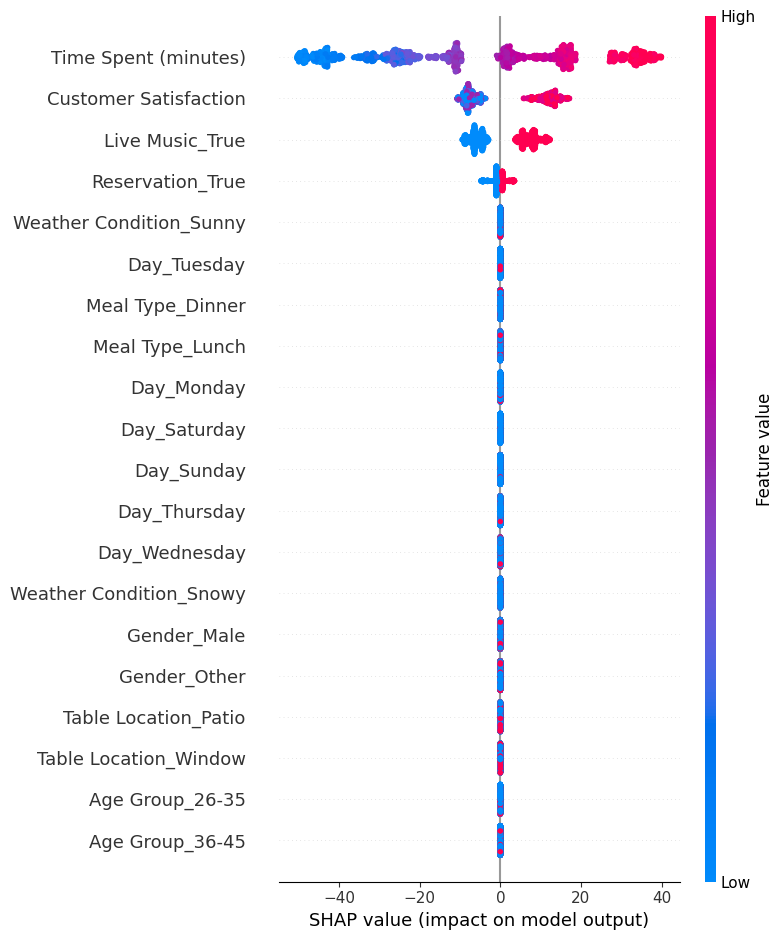

In [82]:
shap.summary_plot(shap_values, features=X, feature_names=df_features.columns)

**SHAP (SHapley Additive exPlanations)** analizi, özellikle karar ağaçları gibi makine öğrenimi modellerinin tahminlerini yorumlamak için kullanılır. SHAP değerleri, her bir özelliğin bir tahmin üzerindeki katkısını ve önemini niceliksel olarak ifade eder. SHAP analizi sonucunda elde edilen grafiği yorumlarken dikkate almanız gereken temel noktalar şunlardır:

**Özelliklerin Önemi:** SHAP değerleri, her bir özelliğin model tahminine olan katkısının büyüklüğünü gösterir. Grafiğinizdeki özellikler, katkılarına göre sıralanır. En üstte yer alan özellik genellikle model tahminleri üzerinde en büyük etkiye sahip olan özelliktir.

**Pozitif ve Negatif Etkiler:** Her bir özelliğin SHAP değerleri, o özelliğin tahmin üzerinde pozitif veya negatif bir etkisi olup olmadığını gösterir. Pozitif değerler, özelliğin tahmini artırdığını (örneğin, bir sınıflandırma modelinde pozitif sınıfa yönlendirdiğini); negatif değerler ise tahmini azalttığını (negatif sınıfa yönlendirdiğini) gösterir.

**Değer Dağılımı:** Her bir özelliğin SHAP değerlerinin dağılımına bakarak, modelinizin farklı özellik değerlerine nasıl tepki verdiğini anlayabilirsiniz. Geniş bir dağılım, modelin o özellik için farklı değerler üzerinde büyük varyasyonlar gösterdiğini gösterir.

**Renklendirme:** SHAP grafiklerinde, genellikle her özellik değeri için renklendirme kullanılır. Bu, özelliklerin değerlerinin tahmin üzerindeki etkisinin yönünü gösterir. Örneğin, yüksek değerlerin pozitif etkiye sahip olduğu durumlarda kırmızı, düşük değerlerin pozitif etkiye sahip olduğu durumlarda mavi kullanılabilir.

**Etkileşimler:** Bazı SHAP grafikleri, özellikler arasındaki etkileşimleri de gösterir. Bu, iki özelliğin birlikte model üzerinde nasıl bir etki yarattığını anlamanıza yardımcı olur.

SHAP analizi, modelinizin hangi özelliklerin önemli olduğunu ve bu özelliklerin nasıl bir etki yarattığını anlamanıza yardımcı olur. Bu bilgiler, modelinizin performansını iyileştirmek, özellik seçimi yapmak veya modelin kararlarını son kullanıcılara açıklamak için kullanılabilir.

**YORUM:** Musterilerin odeyecegi hesap miktarini; "time spendig" in cok olmasi pozitif yonde, az olmasi negatif yonde ve cok etkilemektedir. Az olmasinin negatif etkisi daha fazla. Bu yuzden musterilerin lokantada olabildigince daha fazla zaman gecirmeleri saglanmali.   

"Customer satisfaction"un yuksek olmasi, odenecek hesap miktarini pozitif yonde ve cok etkilerken, "customer satisfaction"'un dusuk olmasi, odenecek hesap miktarini negatif yonde ama az etkilemistir. Benzer durum "live music" icin de gecerlidir. 

In [71]:
feature_names=df_features.columns
feature_names

Index(['Number of People', 'Time Spent (minutes)', 'Customer Satisfaction',
       'Live Music_True', 'Reservation_True', 'Meal Type_Dinner',
       'Meal Type_Lunch', 'Day_Monday', 'Day_Saturday', 'Day_Sunday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'Gender_Male',
       'Gender_Other', 'Table Location_Patio', 'Table Location_Window',
       'Age Group_26-35', 'Age Group_36-45', 'Age Group_46-55',
       'Age Group_56-65', 'Age Group_65+', 'Weather Condition_Rainy',
       'Weather Condition_Snowy', 'Weather Condition_Sunny'],
      dtype='object')

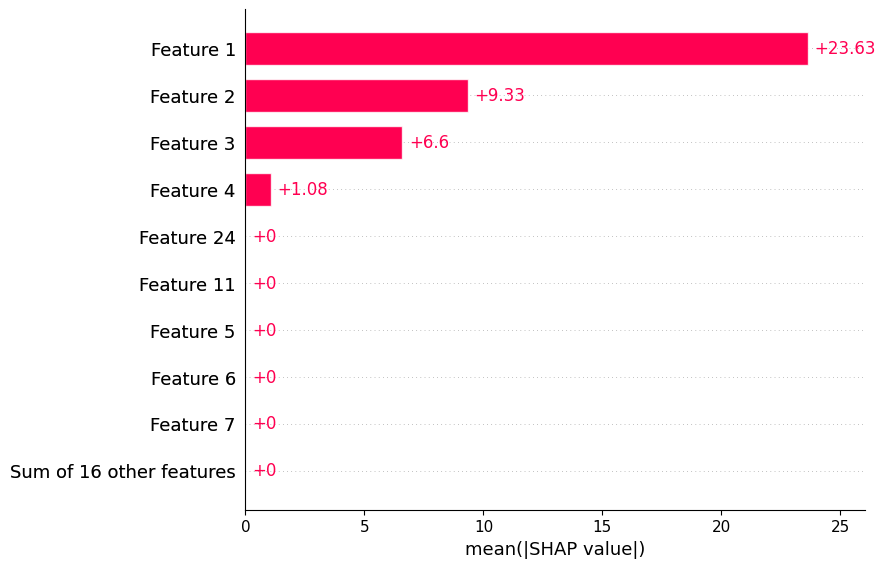

In [83]:
# Etkilerin mutlak degerlerini gosteriyor.

shap.plots.bar(shap_values)

In [84]:
y.value_counts().sum() # toplam kisi sayisini gosterecek

2000

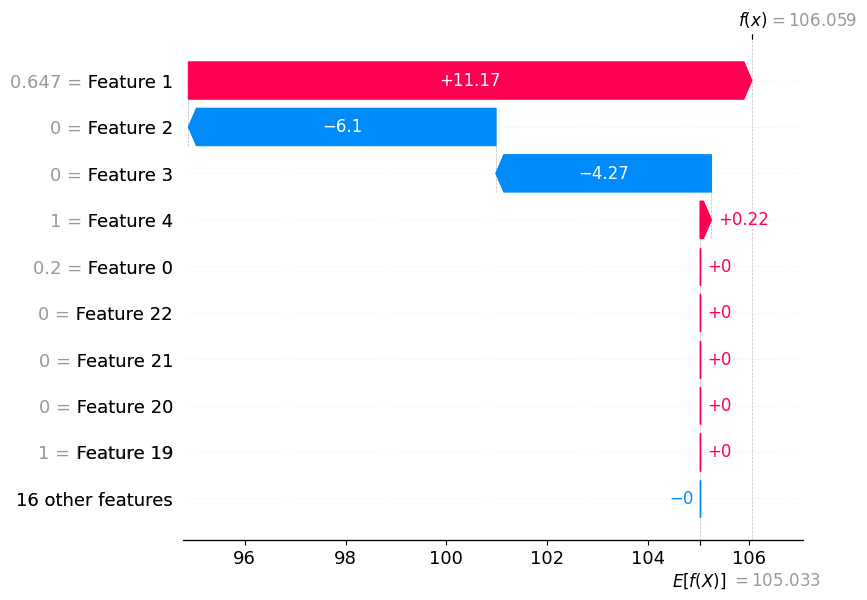

In [91]:
shap.plots.waterfall(shap_values[1999]) 
# Burada gozlem sayisinin 1 eksiginin girilmesinin neseni; bunlarin index numaralari olmasi. 
# 2000 kisi carken 2000. kisinin index numarasi 1999 oluyor. 
# Asagidaki grafik 1999 index numarasina sahip, listedeki 2000. kisi hakkinda bilgi uretecek.

In [30]:
df.columns

Index(['Number of People', 'Time Spent (minutes)', 'Bill Amount ($)',
       'Customer Satisfaction', 'Live Music_True', 'Reservation_True',
       'Meal Type_Dinner', 'Meal Type_Lunch', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Gender_Male', 'Gender_Other', 'Table Location_Patio',
       'Table Location_Window', 'Age Group_26-35', 'Age Group_36-45',
       'Age Group_46-55', 'Age Group_56-65', 'Age Group_65+',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny'],
      dtype='object')

**YORUM:**  Maviler negatif, kirmizilar pozitif etkileri gosteriyor. Musterilerin odeyecegi hesap miktarini  olumlu yonde en fazla etkileyen; 'Time Spent (minutes)' iken musteri memnuniyetinin ve gruptaki kisi sayisinin azligi odenecek faturayi olumsuz yonde etkilemistir.    

Eski calismalardan ornek bir yorum:
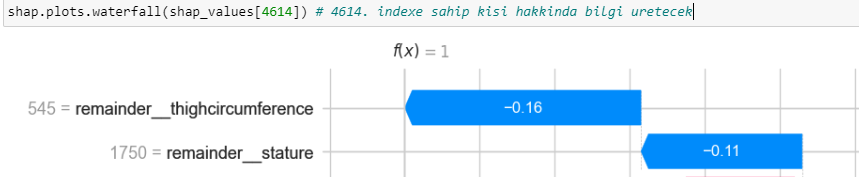

**YORUM:** Eger bu bir kisiye kkredi veriliop verilmeyecegini inceleme grafigi olsaydi, 4614 indeks numarasindaki kisiye kredi verilmesini en fazla negatif etkileyen faktor; "thighcircumference" olacakti.

### 4.3.3. Feature Importance

In [33]:
df_f_i = pd.DataFrame(index=df_features.columns, data = final_DT_model.feature_importances_,
                     columns = ["feature Importance"]).sort_values("feature Importance")
df_f_i

,feature Importance
Number of People,0.000000
Weather Condition_Rainy,0.000000
Age Group_65+,0.000000
Age Group_56-65,0.000000
Age Group_46-55,0.000000
Age Group_36-45,0.000000
Age Group_26-35,0.000000
Table Location_Window,0.000000
Table Location_Patio,0.000000
Gender_Other,0.000000


In [73]:
final_DT_model.feature_importances_

array([0.        , 0.8306512 , 0.1035115 , 0.05938688, 0.00645041,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

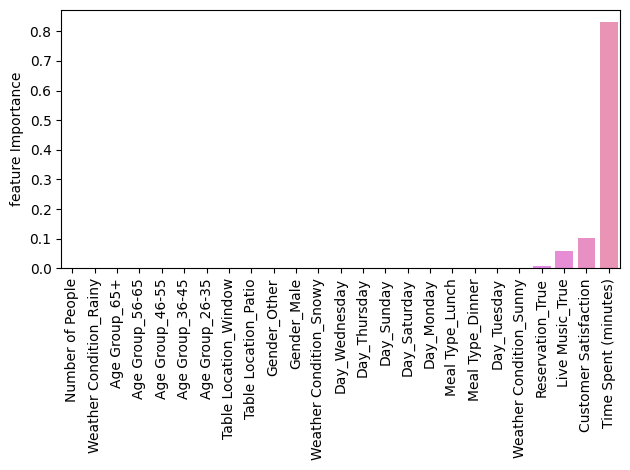

In [74]:
sns.barplot(x=df_f_i.index, y = "feature Importance", data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## 4.4. Final XGB Model

In [36]:
# Yukarida belirledigimiz optimum hyper parametreleri ve tum veri setini kullanarak final XGB modelini tahmin edelim;
from xgboost import XGBRegressor
final_XGB_model=XGBRegressor(colsample_bytree= 0.5, learning_rate= 0.2, max_depth= 3, n_estimators= 500, subsample=0.5).fit(X, y)

### 4.4.1. Save the Final XGB Model

In [37]:
# Final XGB modeli kaydedelim 
import pickle
pickle.dump(final_XGB_model, open("final_XGB_model.pkl", 'wb'))

In [38]:
from joblib import dump

# Modelinizi kaydedin
dump(final_XGB_model, 'final_XGB_model.joblib')

['final_XGB_model.joblib']

### 4.4.2. SHAP

In [36]:
import shap
explainer = shap.Explainer(final_XGB_model.predict, X)
shap_values = explainer(X)

PermutationExplainer explainer: 2001it [01:54, 16.62it/s]                          


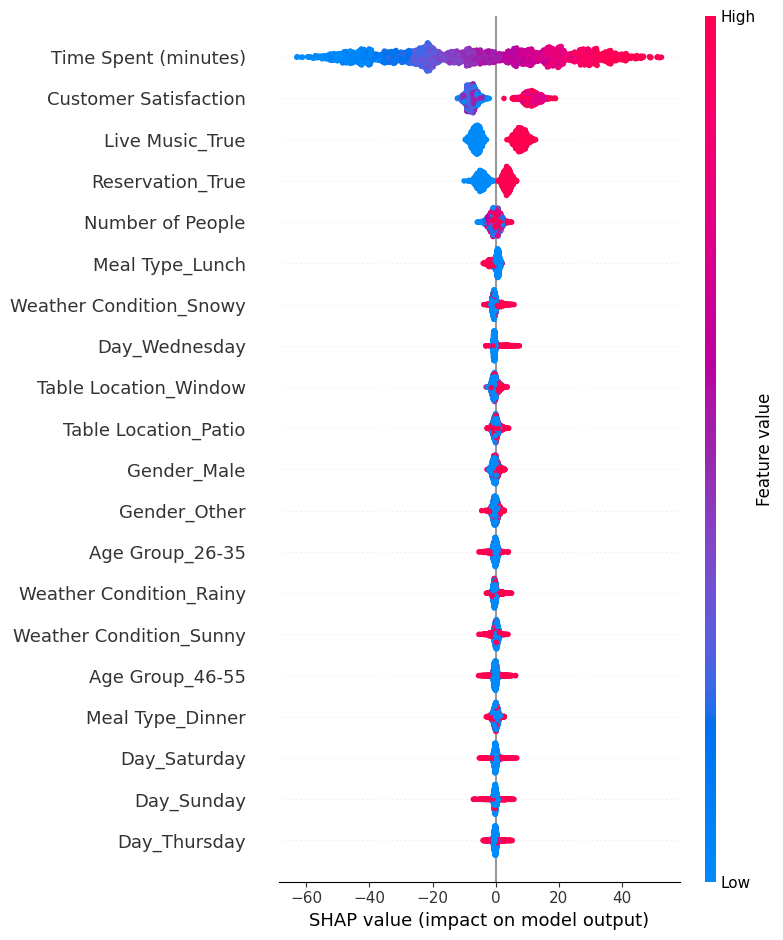

In [37]:
shap.summary_plot(shap_values, features=X, feature_names=df_features.columns)

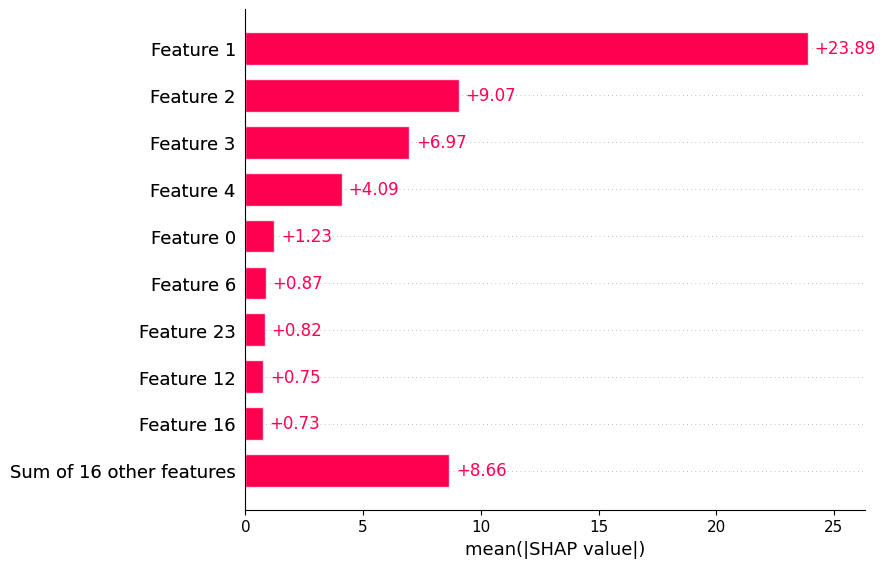

In [38]:
# Etkilerin mutlak degerlerini gosteriyor.

shap.plots.bar(shap_values)

In [39]:
y.value_counts().sum()# analizdeki kisi sayisini gosterir

2000

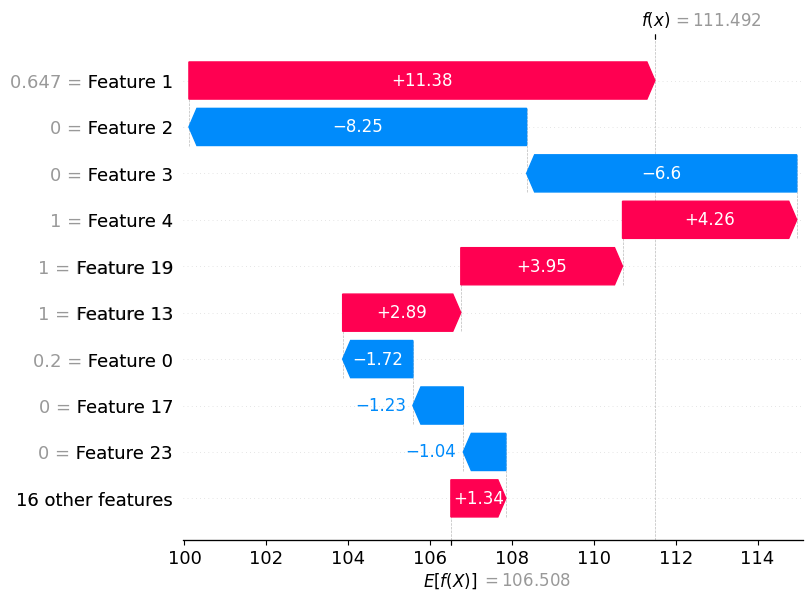

In [40]:
shap.plots.waterfall(shap_values[1999]) 
# Burada gozlem sayisinin 1 eksiginin girilmesinin neseni; bunlarin index numaralari olmasi. 
# 2000 kisi carken 2000. kisinin index numarasi 1999 oluyor. 
# Asagidaki grafik 1999 index numarasina sahip, listedeki 2000. kisi hakkinda bilgi uretecek.


In [44]:
df.columns

Index(['Number of People', 'Time Spent (minutes)', 'Bill Amount ($)',
       'Customer Satisfaction', 'Live Music_True', 'Reservation_True',
       'Meal Type_Dinner', 'Meal Type_Lunch', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Gender_Male', 'Gender_Other', 'Table Location_Patio',
       'Table Location_Window', 'Age Group_26-35', 'Age Group_36-45',
       'Age Group_46-55', 'Age Group_56-65', 'Age Group_65+',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny'],
      dtype='object')

**YORUM:** Odenecek hesap miktarini pozitif yonde en fazla etkileyen 1 index numarali 'Time Spent (minutes)'dir. 

3 index numarali 'Customer Satisfaction' hesap miktarini pozitif de negatif de etkileyebilmektedir. Yani bunun anlami; 'Customer Satisfaction' dusuk oldugunda olumsuz, yuksek oldugunda olumllu yonde etkilemektedir hesabi. 

4 index numarali 'Live Music_True' DT de anlamli bir etkiye sahip gozukmezken, XGB de hesap miktarini olumlu yonde etkiledigi tespit edilmistir. 

### 4.4.3. Feature Importance

In [46]:
df_f_i = pd.DataFrame(index=df_features.columns, data = final_XGB_model.feature_importances_,
                     columns = ["feature Importance"]).sort_values("feature Importance")
df_f_i

,feature Importance
Day_Wednesday,0.022647
Day_Thursday,0.023542
Table Location_Window,0.023544
Age Group_36-45,0.023932
Weather Condition_Snowy,0.024015
Age Group_26-35,0.024485
Age Group_56-65,0.025056
Gender_Male,0.025301
Weather Condition_Rainy,0.025323
Age Group_46-55,0.026192


In [47]:
final_XGB_model.feature_importances_

array([0.02925333, 0.20183569, 0.08538955, 0.09552284, 0.05516299,
       0.02873831, 0.02713199, 0.02622428, 0.02977709, 0.02775501,
       0.02354226, 0.03242566, 0.02264749, 0.02530146, 0.0264913 ,
       0.02823129, 0.02354416, 0.02448529, 0.02393216, 0.02619201,
       0.02505573, 0.03172798, 0.02532307, 0.02401474, 0.03029428],
      dtype=float32)

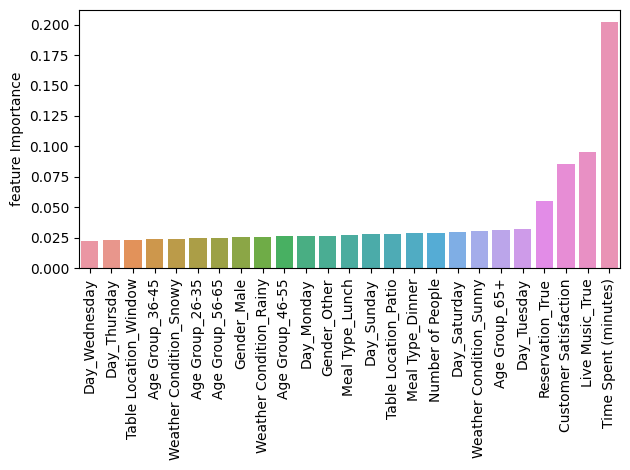

In [49]:
sns.barplot(x=df_f_i.index, y = "feature Importance", data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

**YORUM:** Bu grafige gore; XGB'da odenecek hesap miktarini en fazla etkileyen degiskenler sirasiyla; lokantada gecirilen sure, canli musigin varligi, musteri memnuniyeti ve rezervasyonun varligi olup, DT'de sifir oneme sahip gozuken diger faktorlerin az da olsa hesap miktarini etkiemekte oldugu ortaya cikmistir.  

## 4.5. Final ANN Model

In [39]:
# DL modelini kuruyoruz;
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

seed = 101

tf.random.set_seed(seed) #random sayi uretirken belli bir cekirdek etrafinda dolanmasini ve boylece herkeste ayni sonucun cikmasini saglar.

ANN_model = Sequential() # katmanli, ard arda yapi kullanacagiz.

# 1. Hidden Layer
ANN_model.add(Dense(32, input_dim=X.shape[1], activation = 'relu')) # X.shape[1]; Kullanilan feature sayisini belirtir. 
#model.add(Dropout(0.2)) # %20sini sondur / sifirla   daha iyi bir ogrenme gerceklessin diye


# 2. Hidden Layer
ANN_model.add(Dense(32, activation = 'relu')) # Hidden layerdeki noron 32 tane olacak. 
#model.add(Dropout(0.2))   # Bunu kullaninca skorlar kotulasti. 


# 3. Hidden Layer
ANN_model.add(Dense(16, activation = 'relu')) # Aktivasyon fonksiyonu ara basamaklarda relu kullaniliyor 
#model.add(Dropout(0.2))


# 4. Hidden Layer
ANN_model.add(Dense(8, activation = 'relu'))  # Sona dogru olan hidden layerlerde noron sayisinin azaltilarak verilmesi "best practice"
#model.add(Dropout(0.2))

# Cikis Katmani
ANN_model.add(Dense(1)) # Rgresyon oldugu icin Dense 1 olmali!!!     

# Optimizer'i tanimlayalim 
optimizer = Adam(lr = 0.003) # default learning rate value is 0.001. Bunu 0.002 / 0.003 yapabiliriz. Adam optimizer#i kullaniyoruz burada. Gredient descent de kullanilabilir burada. 

#Modeli compile edelim
ANN_model.compile(optimizer = 'adam', loss = 'mse') # Bu satiri dogru ver! Regresyon analizlerinde loss = 'mse' olmasi onemli. 

# Early Stop
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 25) # "patience=25" epoch boyunca sabret, ondan daha iyi bir skor gelmezse stop et demek. 
# patiance genelde 15, 20, 25 gibi verilir. 
# mode = "auto" Loss degeri dustugu zaman bizim icin daha iyi demek

#Model Summary
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
ANN_model.fit(x = X, y = y, batch_size = 128, epochs = 1500)

Epoch 1/1500



16/16 [==============================] - 1s 3ms/step - loss: 11180.7529
Epoch 2/1500
16/16 [==============================] - 0s 2ms/step - loss: 11140.7979
Epoch 3/1500
16/16 [==============================] - 0s 2ms/step - loss: 11082.2949
Epoch 4/1500
16/16 [==============================] - 0s 2ms/step - loss: 10900.7314
Epoch 5/1500
16/16 [==============================] - 0s 2ms/step - loss: 10431.6338
Epoch 6/1500
16/16 [==============================] - 0s 2ms/step - loss: 9294.7021
Epoch 7/1500
16/16 [==============================] - 0s 2ms/step - loss: 6915.8232
Epoch 8/1500
16/16 [==============================] - 0s 2ms/step - loss: 3345.1619
Epoch 9/1500
16/16 [==============================] - 0s 2ms/step - loss: 1117.9958
Epoch 10/1500
16/16 [==============================] - 0s 2ms/step - loss: 1021.1389
Epoch 11/1500
16/16 [==============================] - 0s 2ms/step - loss: 928.0103
Epoch 12/1500
16/16 [==============================] - 0s 2ms/step - loss: 890.1753

16/16 [==============================] - 0s 2ms/step - loss: 215.7258
Epoch 99/1500
16/16 [==============================] - 0s 2ms/step - loss: 215.7637
Epoch 100/1500
16/16 [==============================] - 0s 2ms/step - loss: 215.5867
Epoch 101/1500
16/16 [==============================] - 0s 2ms/step - loss: 214.8512
Epoch 102/1500
16/16 [==============================] - 0s 2ms/step - loss: 215.0863
Epoch 103/1500
16/16 [==============================] - 0s 2ms/step - loss: 214.8313
Epoch 104/1500
16/16 [==============================] - 0s 1ms/step - loss: 215.6893
Epoch 105/1500
16/16 [==============================] - 0s 2ms/step - loss: 213.8883
Epoch 106/1500
16/16 [==============================] - 0s 2ms/step - loss: 213.7349
Epoch 107/1500
16/16 [==============================] - 0s 2ms/step - loss: 214.6113
Epoch 108/1500
16/16 [==============================] - 0s 1ms/step - loss: 214.1086
Epoch 109/1500
16/16 [==============================] - 0s 2ms/step - loss: 214.2

16/16 [==============================] - 0s 2ms/step - loss: 195.9751
Epoch 195/1500
16/16 [==============================] - 0s 2ms/step - loss: 195.5123
Epoch 196/1500
16/16 [==============================] - 0s 1ms/step - loss: 195.5357
Epoch 197/1500
16/16 [==============================] - 0s 2ms/step - loss: 194.9284
Epoch 198/1500
16/16 [==============================] - 0s 2ms/step - loss: 196.9326
Epoch 199/1500
16/16 [==============================] - 0s 1ms/step - loss: 195.8761
Epoch 200/1500
16/16 [==============================] - 0s 2ms/step - loss: 197.0737
Epoch 201/1500
16/16 [==============================] - 0s 2ms/step - loss: 194.9002
Epoch 202/1500
16/16 [==============================] - 0s 1ms/step - loss: 195.0451
Epoch 203/1500
16/16 [==============================] - 0s 2ms/step - loss: 195.0803
Epoch 204/1500
16/16 [==============================] - 0s 2ms/step - loss: 194.3201
Epoch 205/1500
16/16 [==============================] - 0s 2ms/step - loss: 195.

16/16 [==============================] - 0s 2ms/step - loss: 179.7470
Epoch 291/1500
16/16 [==============================] - 0s 2ms/step - loss: 180.0486
Epoch 292/1500
16/16 [==============================] - 0s 2ms/step - loss: 179.9589
Epoch 293/1500
16/16 [==============================] - 0s 2ms/step - loss: 179.3263
Epoch 294/1500
16/16 [==============================] - 0s 2ms/step - loss: 179.4646
Epoch 295/1500
16/16 [==============================] - 0s 1ms/step - loss: 179.3895
Epoch 296/1500
16/16 [==============================] - 0s 2ms/step - loss: 178.9566
Epoch 297/1500
16/16 [==============================] - 0s 3ms/step - loss: 178.8585
Epoch 298/1500
16/16 [==============================] - 0s 2ms/step - loss: 179.6321
Epoch 299/1500
16/16 [==============================] - 0s 1ms/step - loss: 178.8973
Epoch 300/1500
16/16 [==============================] - 0s 2ms/step - loss: 178.3564
Epoch 301/1500
16/16 [==============================] - 0s 2ms/step - loss: 180.

16/16 [==============================] - 0s 2ms/step - loss: 170.9843
Epoch 387/1500
16/16 [==============================] - 0s 2ms/step - loss: 170.4826
Epoch 388/1500
16/16 [==============================] - 0s 2ms/step - loss: 170.4655
Epoch 389/1500
16/16 [==============================] - 0s 2ms/step - loss: 173.3828
Epoch 390/1500
16/16 [==============================] - 0s 1ms/step - loss: 170.0421
Epoch 391/1500
16/16 [==============================] - 0s 2ms/step - loss: 170.5932
Epoch 392/1500
16/16 [==============================] - 0s 2ms/step - loss: 172.3017
Epoch 393/1500
16/16 [==============================] - 0s 2ms/step - loss: 170.5499
Epoch 394/1500
16/16 [==============================] - 0s 2ms/step - loss: 168.7022
Epoch 395/1500
16/16 [==============================] - 0s 2ms/step - loss: 169.0513
Epoch 396/1500
16/16 [==============================] - 0s 2ms/step - loss: 169.5537
Epoch 397/1500
16/16 [==============================] - 0s 1ms/step - loss: 168.

16/16 [==============================] - 0s 1ms/step - loss: 162.8203
Epoch 483/1500
16/16 [==============================] - 0s 2ms/step - loss: 163.5975
Epoch 484/1500
16/16 [==============================] - 0s 2ms/step - loss: 161.4282
Epoch 485/1500
16/16 [==============================] - 0s 1ms/step - loss: 161.7654
Epoch 486/1500
16/16 [==============================] - 0s 2ms/step - loss: 162.2443
Epoch 487/1500
16/16 [==============================] - 0s 2ms/step - loss: 161.9486
Epoch 488/1500
16/16 [==============================] - 0s 2ms/step - loss: 162.3301
Epoch 489/1500
16/16 [==============================] - 0s 2ms/step - loss: 161.8562
Epoch 490/1500
16/16 [==============================] - 0s 2ms/step - loss: 162.2337
Epoch 491/1500
16/16 [==============================] - 0s 1ms/step - loss: 162.3616
Epoch 492/1500
16/16 [==============================] - 0s 2ms/step - loss: 162.7172
Epoch 493/1500
16/16 [==============================] - 0s 2ms/step - loss: 160.

16/16 [==============================] - 0s 2ms/step - loss: 155.6208
Epoch 579/1500
16/16 [==============================] - 0s 2ms/step - loss: 156.0649
Epoch 580/1500
16/16 [==============================] - 0s 2ms/step - loss: 156.7607
Epoch 581/1500
16/16 [==============================] - 0s 2ms/step - loss: 154.4836
Epoch 582/1500
16/16 [==============================] - 0s 2ms/step - loss: 154.3692
Epoch 583/1500
16/16 [==============================] - 0s 2ms/step - loss: 154.8381
Epoch 584/1500
16/16 [==============================] - 0s 2ms/step - loss: 155.0349
Epoch 585/1500
16/16 [==============================] - 0s 1ms/step - loss: 155.0281
Epoch 586/1500
16/16 [==============================] - 0s 2ms/step - loss: 155.2987
Epoch 587/1500
16/16 [==============================] - 0s 2ms/step - loss: 155.0618
Epoch 588/1500
16/16 [==============================] - 0s 1ms/step - loss: 154.5698
Epoch 589/1500
16/16 [==============================] - 0s 2ms/step - loss: 155.

16/16 [==============================] - 0s 1ms/step - loss: 147.8431
Epoch 675/1500
16/16 [==============================] - 0s 2ms/step - loss: 147.8061
Epoch 676/1500
16/16 [==============================] - 0s 2ms/step - loss: 148.1051
Epoch 677/1500
16/16 [==============================] - 0s 2ms/step - loss: 148.2036
Epoch 678/1500
16/16 [==============================] - 0s 2ms/step - loss: 146.8926
Epoch 679/1500
16/16 [==============================] - 0s 1ms/step - loss: 147.2183
Epoch 680/1500
16/16 [==============================] - 0s 2ms/step - loss: 147.2450
Epoch 681/1500
16/16 [==============================] - 0s 1ms/step - loss: 146.6015
Epoch 682/1500
16/16 [==============================] - 0s 2ms/step - loss: 149.0809
Epoch 683/1500
16/16 [==============================] - 0s 2ms/step - loss: 147.9507
Epoch 684/1500
16/16 [==============================] - 0s 1ms/step - loss: 146.7832
Epoch 685/1500
16/16 [==============================] - 0s 1ms/step - loss: 147.

16/16 [==============================] - 0s 2ms/step - loss: 140.2221
Epoch 771/1500
16/16 [==============================] - 0s 2ms/step - loss: 141.1109
Epoch 772/1500
16/16 [==============================] - 0s 2ms/step - loss: 141.0885
Epoch 773/1500
16/16 [==============================] - 0s 2ms/step - loss: 142.0378
Epoch 774/1500
16/16 [==============================] - 0s 2ms/step - loss: 140.6487
Epoch 775/1500
16/16 [==============================] - 0s 2ms/step - loss: 140.1433
Epoch 776/1500
16/16 [==============================] - 0s 2ms/step - loss: 140.1664
Epoch 777/1500
16/16 [==============================] - 0s 2ms/step - loss: 141.2339
Epoch 778/1500
16/16 [==============================] - 0s 2ms/step - loss: 138.9719
Epoch 779/1500
16/16 [==============================] - 0s 2ms/step - loss: 140.8429
Epoch 780/1500
16/16 [==============================] - 0s 1ms/step - loss: 139.1856
Epoch 781/1500
16/16 [==============================] - 0s 1ms/step - loss: 138.

16/16 [==============================] - 0s 2ms/step - loss: 135.6570
Epoch 867/1500
16/16 [==============================] - 0s 2ms/step - loss: 136.7228
Epoch 868/1500
16/16 [==============================] - 0s 1ms/step - loss: 133.9304
Epoch 869/1500
16/16 [==============================] - 0s 2ms/step - loss: 133.3411
Epoch 870/1500
16/16 [==============================] - 0s 2ms/step - loss: 132.6856
Epoch 871/1500
16/16 [==============================] - 0s 1ms/step - loss: 134.9001
Epoch 872/1500
16/16 [==============================] - 0s 1ms/step - loss: 132.6444
Epoch 873/1500
16/16 [==============================] - 0s 2ms/step - loss: 134.4379
Epoch 874/1500
16/16 [==============================] - 0s 1ms/step - loss: 133.0562
Epoch 875/1500
16/16 [==============================] - 0s 2ms/step - loss: 132.8136
Epoch 876/1500
16/16 [==============================] - 0s 1ms/step - loss: 134.1215
Epoch 877/1500
16/16 [==============================] - 0s 2ms/step - loss: 134.

16/16 [==============================] - 0s 2ms/step - loss: 125.9923
Epoch 963/1500
16/16 [==============================] - 0s 2ms/step - loss: 125.8075
Epoch 964/1500
16/16 [==============================] - 0s 1ms/step - loss: 126.2541
Epoch 965/1500
16/16 [==============================] - 0s 1ms/step - loss: 125.8866
Epoch 966/1500
16/16 [==============================] - 0s 1ms/step - loss: 126.4081
Epoch 967/1500
16/16 [==============================] - 0s 2ms/step - loss: 126.5431
Epoch 968/1500
16/16 [==============================] - 0s 1ms/step - loss: 126.7235
Epoch 969/1500
16/16 [==============================] - 0s 1ms/step - loss: 125.6957
Epoch 970/1500
16/16 [==============================] - 0s 2ms/step - loss: 126.2518
Epoch 971/1500
16/16 [==============================] - 0s 1ms/step - loss: 126.2137
Epoch 972/1500
16/16 [==============================] - 0s 1ms/step - loss: 126.0375
Epoch 973/1500
16/16 [==============================] - 0s 2ms/step - loss: 126.

16/16 [==============================] - 0s 2ms/step - loss: 120.8762
Epoch 1058/1500
16/16 [==============================] - 0s 2ms/step - loss: 121.1951
Epoch 1059/1500
16/16 [==============================] - 0s 2ms/step - loss: 121.4626
Epoch 1060/1500
16/16 [==============================] - 0s 1ms/step - loss: 119.6112
Epoch 1061/1500
16/16 [==============================] - 0s 1ms/step - loss: 119.8960
Epoch 1062/1500
16/16 [==============================] - 0s 2ms/step - loss: 120.8099
Epoch 1063/1500
16/16 [==============================] - 0s 1ms/step - loss: 122.0691
Epoch 1064/1500
16/16 [==============================] - 0s 2ms/step - loss: 122.4570
Epoch 1065/1500
16/16 [==============================] - 0s 1ms/step - loss: 119.7304
Epoch 1066/1500
16/16 [==============================] - 0s 2ms/step - loss: 118.2375
Epoch 1067/1500
16/16 [==============================] - 0s 1ms/step - loss: 118.6427
Epoch 1068/1500
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 2ms/step - loss: 113.6347
Epoch 1153/1500
16/16 [==============================] - 0s 2ms/step - loss: 111.4284
Epoch 1154/1500
16/16 [==============================] - 0s 2ms/step - loss: 111.5667
Epoch 1155/1500
16/16 [==============================] - 0s 2ms/step - loss: 111.1219
Epoch 1156/1500
16/16 [==============================] - 0s 2ms/step - loss: 113.3808
Epoch 1157/1500
16/16 [==============================] - 0s 1ms/step - loss: 111.8550
Epoch 1158/1500
16/16 [==============================] - 0s 2ms/step - loss: 111.2721
Epoch 1159/1500
16/16 [==============================] - 0s 1ms/step - loss: 110.4078
Epoch 1160/1500
16/16 [==============================] - 0s 1ms/step - loss: 111.0894
Epoch 1161/1500
16/16 [==============================] - 0s 2ms/step - loss: 110.7682
Epoch 1162/1500
16/16 [==============================] - 0s 2ms/step - loss: 111.0333
Epoch 1163/1500
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 2ms/step - loss: 105.3908
Epoch 1248/1500
16/16 [==============================] - 0s 2ms/step - loss: 104.6419
Epoch 1249/1500
16/16 [==============================] - 0s 2ms/step - loss: 105.4187
Epoch 1250/1500
16/16 [==============================] - 0s 2ms/step - loss: 106.3979
Epoch 1251/1500
16/16 [==============================] - 0s 2ms/step - loss: 107.4659
Epoch 1252/1500
16/16 [==============================] - 0s 1ms/step - loss: 105.3225
Epoch 1253/1500
16/16 [==============================] - 0s 2ms/step - loss: 105.0973
Epoch 1254/1500
16/16 [==============================] - 0s 2ms/step - loss: 109.9263
Epoch 1255/1500
16/16 [==============================] - 0s 2ms/step - loss: 107.5458
Epoch 1256/1500
16/16 [==============================] - 0s 2ms/step - loss: 105.4643
Epoch 1257/1500
16/16 [==============================] - 0s 1ms/step - loss: 104.2957
Epoch 1258/1500
16/16 [==============================] - 0s 2ms/step -

16/16 [==============================] - 0s 2ms/step - loss: 99.0962
Epoch 1343/1500
16/16 [==============================] - 0s 2ms/step - loss: 99.0194
Epoch 1344/1500
16/16 [==============================] - 0s 2ms/step - loss: 99.3838
Epoch 1345/1500
16/16 [==============================] - 0s 2ms/step - loss: 99.3936
Epoch 1346/1500
16/16 [==============================] - 0s 2ms/step - loss: 99.3172
Epoch 1347/1500
16/16 [==============================] - 0s 2ms/step - loss: 100.2810
Epoch 1348/1500
16/16 [==============================] - 0s 2ms/step - loss: 100.0233
Epoch 1349/1500
16/16 [==============================] - 0s 2ms/step - loss: 99.0647
Epoch 1350/1500
16/16 [==============================] - 0s 2ms/step - loss: 98.9095
Epoch 1351/1500
16/16 [==============================] - 0s 2ms/step - loss: 98.6734
Epoch 1352/1500
16/16 [==============================] - 0s 2ms/step - loss: 98.9376
Epoch 1353/1500
16/16 [==============================] - 0s 2ms/step - loss: 99

16/16 [==============================] - 0s 2ms/step - loss: 93.8255
Epoch 1439/1500
16/16 [==============================] - 0s 2ms/step - loss: 95.5110
Epoch 1440/1500
16/16 [==============================] - 0s 2ms/step - loss: 94.5057
Epoch 1441/1500
16/16 [==============================] - 0s 2ms/step - loss: 94.2679
Epoch 1442/1500
16/16 [==============================] - 0s 2ms/step - loss: 93.9953
Epoch 1443/1500
16/16 [==============================] - 0s 2ms/step - loss: 93.4723
Epoch 1444/1500
16/16 [==============================] - 0s 2ms/step - loss: 93.8672
Epoch 1445/1500
16/16 [==============================] - 0s 2ms/step - loss: 93.5143
Epoch 1446/1500
16/16 [==============================] - 0s 2ms/step - loss: 94.2913
Epoch 1447/1500
16/16 [==============================] - 0s 2ms/step - loss: 96.1008
Epoch 1448/1500
16/16 [==============================] - 0s 2ms/step - loss: 99.9006
Epoch 1449/1500
16/16 [==============================] - 0s 2ms/step - loss: 98.8

In [41]:
# Modeli h5 olarak kaydetmek icin;
ANN_model.save("final_ANN_model.h5")

In [42]:
# Modeli Kreas olarak kaydedelim
ANN_model.save("final_ANN_model.keras")

### 4.5.1. Eval Metric'leri Alalim

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [44]:
# DT icin skorlar
y_pred = final_DT_model.predict(X)
eval_metric(y, y_pred)


r2_score: 0.8035408652187307 
mae: 12.139308422925085 
mse: 211.51521555218025 
rmse: 14.543562684300579


In [45]:
# XGB icin skorlar
y_pred = final_XGB_model.predict(X)
eval_metric(y, y_pred)

r2_score: 0.9040378943098958 
mae: 8.36851404083252 
mse: 103.3163741277898 
rmse: 10.164466249035893


In [46]:
# ANN icin skorlar
y_pred = ANN_model.predict(X)
eval_metric(y, y_pred)

63/63 [==============================] - 0s 1ms/step
r2_score: 0.9164014013002552 
mae: 7.486719310913085 
mse: 90.0053624053862 
rmse: 9.487115599874716


**YORUM:** En basarili modelin ANN modeli oldugu gorulmektedir.

# 5. PREDICTION

## 5.1. Loading Scaler and Models 

In [50]:
from tensorflow.keras.models import load_model
import pickle

final_scaler = pickle.load(open("final_scaler_saved.pkl", "rb"))
DT_model = pickle.load(open('final_DT_model.pkl', "rb"))
XGB_model = pickle.load(open('final_XGB_model.pkl', "rb"))
ANN_model = load_model('final_ANN_model.h5')                      

## 5.2. Prediction

Burada encoding yapilmis verileri kullaniyoruz.

Eger veriyi bastan okutacaksak, encoded_data.pkl yi yeniden okutarak, encoding islemi yapmak gerekir. 

In [51]:
df.head(1)

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,117.08,4,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [52]:
# Elimizdeki mevcut data setinden bir gozlem cekelim;

Customer_A = df.drop('Bill Amount ($)', axis = 1).iloc[0:1, :]   # 2:3 yazarsan 2 index numarali (listedeki 3. siradaki) musteriyi cekersin.
Customer_A

,Number of People,Time Spent (minutes),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,Day_Sunday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,4,102,4,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [53]:
# Bu dataya scaling uygulayalim;
Customer_A_Scaled = final_scaler.transform(Customer_A)
Customer_A_Scaled

array([[0.6 , 0.48, 0.75, 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]])

### 5.2.1. DT ile Predict Alalim

In [58]:
DT_model.predict(Customer_A_Scaled)

array([99.91333333])

In [55]:
# Gercekte odenen hesap
df.iloc[0][2]

117.08

**Yorum:** 0 indexe sahip musteri gercekte 117.08 USD'lik odeme yapmis. DT model bunu 99.91 USD olarak tahmin etti. 


### 5.2.2. XGB ile Predict Alalim

In [56]:
XGB_model.predict(Customer_A_Scaled)

array([108.846504], dtype=float32)

**Yorum:** 0 indexe sahip musteri gercekte 117.66 USD'lik odeme yapmis. XGB model bunu 108.64 USD olarak tahmin etti. 

### 5.2.3. ANN ile Predict Alalim

In [57]:
ANN_model.predict(Customer_A_Scaled)

1/1 [==============================] - 0s 83ms/step


array([[107.826454]], dtype=float32)

**Yorum:** 0 indexe sahip musteri gercekte 117.08 USD'lik odeme yapmis. ANN model bunu 107.82 USD olarak tahmin etti. 

### 5.2.4. Yeni Bir Gozleme Ait Degerleri Kullanarak Predict Yapalim

In [78]:
df.columns

Index(['Number of People', 'Time Spent (minutes)', 'Bill Amount ($)',
       'Customer Satisfaction', 'Live Music_True', 'Reservation_True',
       'Meal Type_Dinner', 'Meal Type_Lunch', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Gender_Male', 'Gender_Other', 'Table Location_Patio',
       'Table Location_Window', 'Age Group_26-35', 'Age Group_36-45',
       'Age Group_46-55', 'Age Group_56-65', 'Age Group_65+',
       'Weather Condition_Rainy', 'Weather Condition_Snowy',
       'Weather Condition_Sunny'],
      dtype='object')

In [59]:
data = {
    "Day": ['Monday'],
    "Meal Type": ['Dinner'],
    "Number of People": [2],
    "Time Spent (minutes)": [125],
    "Gender": ['Male'],
    "Table Location": ['Window'],
    "Reservation": [1],
    "Customer Satisfaction": [4],
    "Live Music": [1],
    "Age Group": ['18-25'],
    "Weather Condition": ['Cloudy']
}

# Yeni DataFrame oluşturma
df_new = pd.DataFrame(data)
df_new

,Day,Meal Type,Number of People,Time Spent (minutes),Gender,Table Location,Reservation,Customer Satisfaction,Live Music,Age Group,Weather Condition
0,Monday,Dinner,2,125,Male,Window,1,4,1,18-25,Cloudy


In [60]:
# df_new'e ENCODING YAPIYORUZ

encoded_data = pd.read_pickle('encoded_data.pkl')

# Apply the same encoding to df_new
df_new_encoded = pd.get_dummies(df_new, columns=['Live Music', 'Reservation', 'Meal Type', 'Day', 'Gender', 'Table Location', 'Age Group', 'Weather Condition'], drop_first=True)

# Dönüştürülen sütunların veri tipini int'e çevirme
for column in df_new_encoded.columns:
    if df_new_encoded[column].dtype == 'bool':
        df_new_encoded[column] = df_new_encoded[column].astype(int)
        
# Ensure that the columns in df_new_encoded are the same as in the original encoding
# This is important to make sure the order and presence of columns are consistent

df_new_encoded = df_new_encoded.reindex(columns=encoded_data.columns, fill_value=0)
df_new_encoded

,Number of People,Time Spent (minutes),Bill Amount ($),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,2,125,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Aciklama:** Encoding yaparken, veri setinin ilk halinde var olarak gordugu, ama yeni veri setinde bulamadigi verilere 0 degerini atiyor. 

Biz "Bill Amount ($)" un 0 olmadigini biliyoruz. Hatta bunu tahmin etmeye calisiyoruz. Bu nedenle bu sutunu drop edelim. Modelin bu degeri bulmasini isteyelim. 

In [61]:
df_new_encoded.drop(['Bill Amount ($)'], axis=1, inplace=True)
df_new_encoded

,Number of People,Time Spent (minutes),Customer Satisfaction,Live Music_True,Reservation_True,Meal Type_Dinner,Meal Type_Lunch,Day_Monday,Day_Saturday,Day_Sunday,...,Table Location_Patio,Table Location_Window,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny
0,2,125,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ilk basta  "encoded_data.pkl" kismini kaydederken; canli muzik var i ve rezervasyon var'i 0 ile gosterdigi icin burada biz canli muzik ve rezervasyon var dedigimiz halde bunlari 0 oarak encode etti.


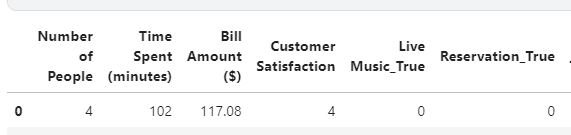 

In [62]:
# SCALING YAPIYORUZ;

df_new_encoded_Scaled = final_scaler.transform(df_new_encoded)
df_new_encoded_Scaled

array([[0.2       , 0.63333333, 0.75      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [63]:
DT_model.predict(df_new_encoded_Scaled)

array([114.30901235])

In [64]:
XGB_model.predict(df_new_encoded_Scaled)

array([107.288506], dtype=float32)

In [66]:
ANN_model.predict(df_new_encoded_Scaled)

1/1 [==============================] - 0s 32ms/step


array([[78.75551]], dtype=float32)

**YORUM:** Bu musterinin ANNmldeline gore 78 USD hesap odemesi beklenmektedir.

Bu calismanin Streamlit ile Deploy edilmis hali: 

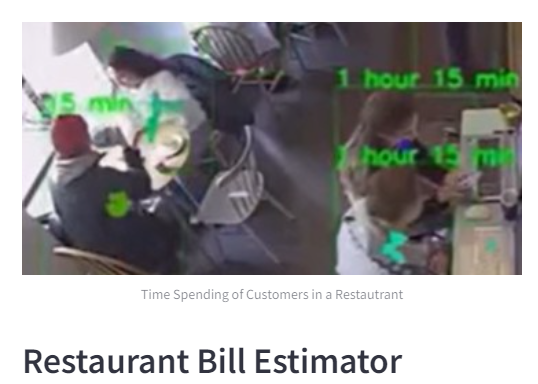



The End